# Analysis after running the analysis/crowdsource catalogs


Run these as batch jobs 
```
analysis/crowdsource_catalogs_long.py
analysis/crowdsource_catalogs_short.py
```

In [1]:
cd /orange/adamginsburg/jwst/brick/

/blue/adamginsburg/adamginsburg/jwst/brick


In [2]:
%matplotlib inline

In [3]:
basepath = '/orange/adamginsburg/jwst/brick/'

In [4]:
%run $basepath/analysis/analysis_setup.py
basetable = basetable_nrca # don't use the merged version for this notebook

/orange/adamginsburg/jwst/brick//reduction/filtering.py:20: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set DATE-AVG to '2022-08-28T03:05:32.473' from MJD-AVG.
Set DATE-END to '2022-08-28T03:34:03.557' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to   -20.651775 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526292809.682 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [5]:
%run $basepath/analysis/selections.py --module=nrca
assert len(basetable) == len(basetable_nrca)

Selecting module nrca
1233 saturated in near_saturated_f212n_f212n
171 saturated in near_saturated_f466n_f466n
530 saturated in near_saturated_f405n_f405n
1060 saturated in near_saturated_f187n_f187n
7632 saturated in near_saturated_f182m_f182m
9717 near saturated out of 289206.  That leaves 279489 not near unsaturated
126 saturated in replaced_saturated_f212n
48 saturated in replaced_saturated_f466n
178 saturated in replaced_saturated_f405n
55 saturated in replaced_saturated_f187n
222 saturated in replaced_saturated_f182m
1312 saturated out of 289206.  That leaves 287894 unsaturated
Filter f410m has qf=61929, spread=68647, fracflux=47462 ok, totaling 45237.  There are 289206 total, of which 226777 are masked and 62429 are unmasked. qfmasksum=218116, inverse=71090.
Filter f212n has qf=119077, spread=123906, fracflux=101766 ok, totaling 101274.  There are 289206 total, of which 167569 are masked and 121637 are unmasked. qfmasksum=164843, inverse=124363.
Filter f466n has qf=46231, spread

# Using the tables only, correct for the median offset

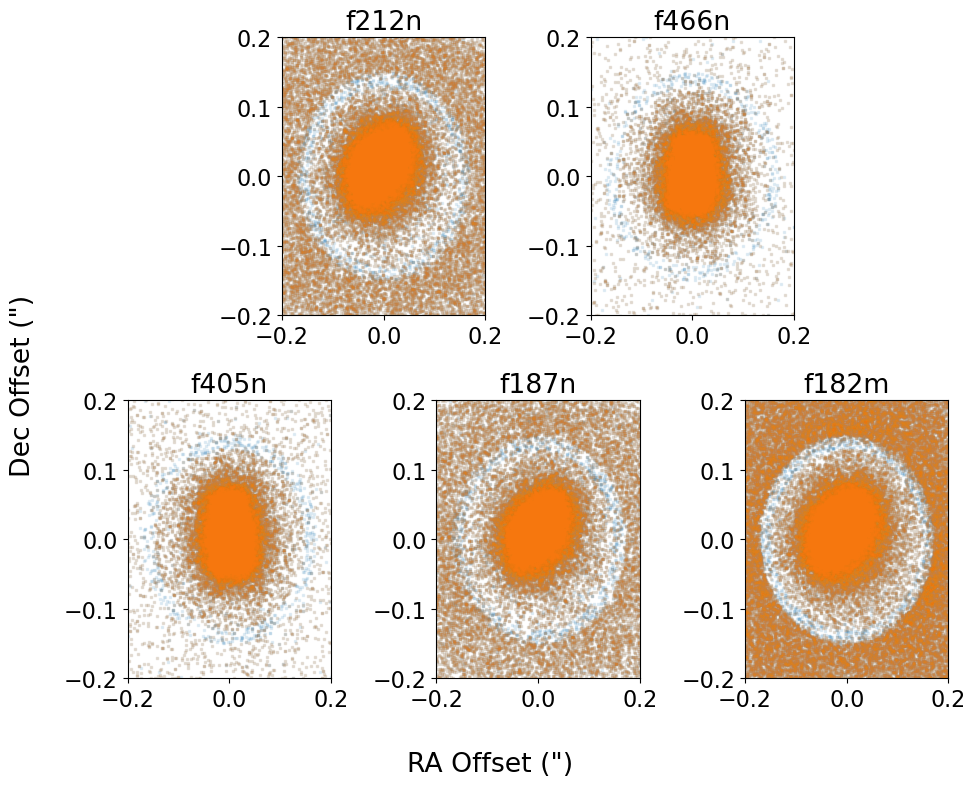

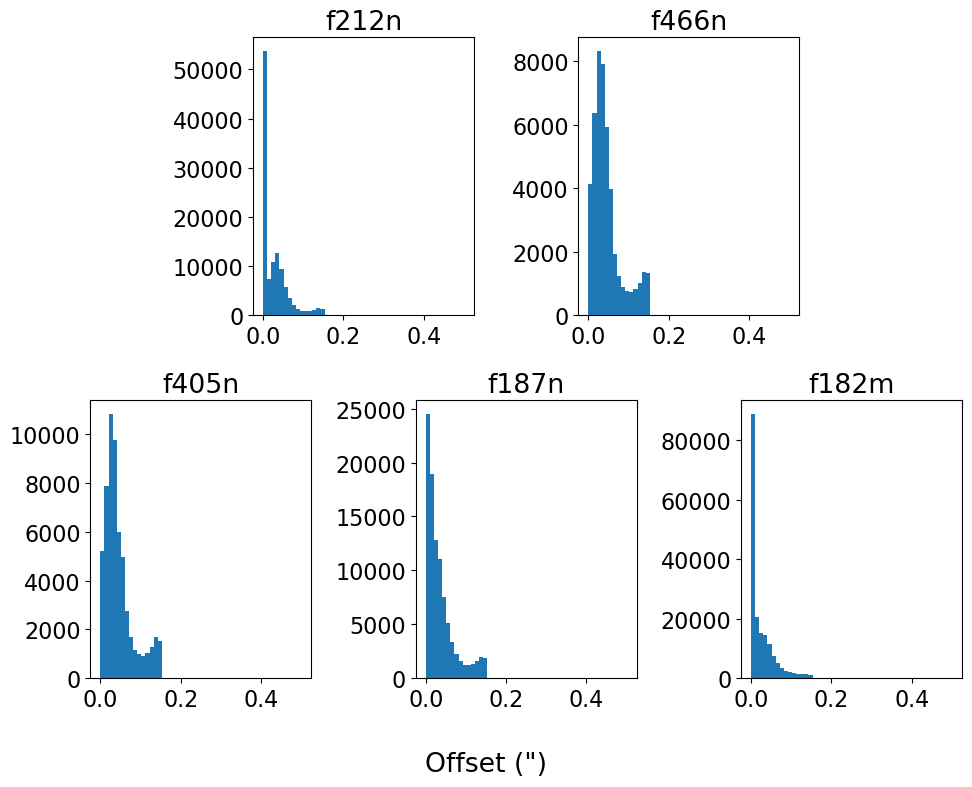

<Figure size 1000x800 with 0 Axes>

In [6]:
plot_tools.xmatch_plot(basetable, sel=any_good, axlims=[-0.2,0.2,-0.2,0.2]);

In [7]:
basetable[reg.contains(basetable['skycoord_f405n'],ww)][:5]

<Table length=5>
             skycoord_ref             sep_f410m id_f410m             skycoord_f410m                 x_f410m           y_f410m       flux_f410m ... mag_ab_187m182 good_f410m good_f212n good_f466n good_f405n good_f187n good_f182m
               deg,deg                   deg                            deg,deg                                                                ...                                                                                 
               SkyCoord                float64   int64                  SkyCoord                    float64           float64        float32   ...    float32        bool       bool       bool       bool       bool       bool   
------------------------------------- --------- -------- ------------------------------------- ----------------- ------------------ ---------- ... -------------- ---------- ---------- ---------- ---------- ---------- ----------
266.5352922061433,-28.748975633348287       0.0    34797 266.5352922061433,-28.748975633348287 771.9351278476892 1118.7244312744099 -11.072509 ...      20.867815      False       True         --         --         --      False
266.53533239732616,-28.74859650248997       0.0    34830 266.53533239732616,-28.74859650248997 793.5954947500387 1121.1005143207447  20.454853 ...      20.808517      False       True         --         --         --       True
 266.5352594177805,-28.74502555721481       0.0    34835  266.5352594177805,-28.74502555721481 997.9851578614011 1120.8283492262772  -966.5278 ...       20.30863      False         --         --         --         --         --
266.5353552224215,-28.748378503579204       0.0    34865 266.5353552224215,-28.748378503579204  806.050366027889 1122.4524781392975  16.282742 ...      20.726526      False         --         --         --         --      False
266.5353793087526,-28.748640883402445       0.0    34890 266.5353793087526,-28.748640883402445 791.0169905585219 1123.4117904373802  46.470844 ...      20.808517       True       True       True       True         --       True

In [8]:
basetable[reg.contains(basetable['skycoord_f410m'],ww)][:5]['flux_f410m', 'skycoord_f410m', 'x_f410m', 'y_f410m']

<Table length=5>
flux_f410m             skycoord_f410m                  x_f410m           y_f410m      
                          deg,deg                                                     
 float32                  SkyCoord                     float64           float64      
---------- -------------------------------------- ----------------- ------------------
 16.282742  266.5353552224215,-28.748378503579204  806.050366027889 1122.4524781392975
 46.470844  266.5353793087526,-28.748640883402445 791.0169905585219 1123.4117904373802
  9.573544   266.535462703112,-28.750284796720496 696.8831297705162 1126.0351118785761
 23.538519 266.53544597327704,-28.749654992849536 732.9343314732964 1125.7936111947372
 19.318865   266.5354281730268,-28.74874990617773 784.7380630554667   1125.75967937307

In [9]:
#(500*u.Jy).to(u.ABmag)
(basetable[reg.contains(basetable['skycoord_f410m'],ww)][:5]['flux_f410m'] * u.Jy).to(u.ABmag)

<Magnitude [5.8706813, 4.7320485, 6.447318 , 5.470552 , 5.6850457] mag(AB)>

# Flux Histograms

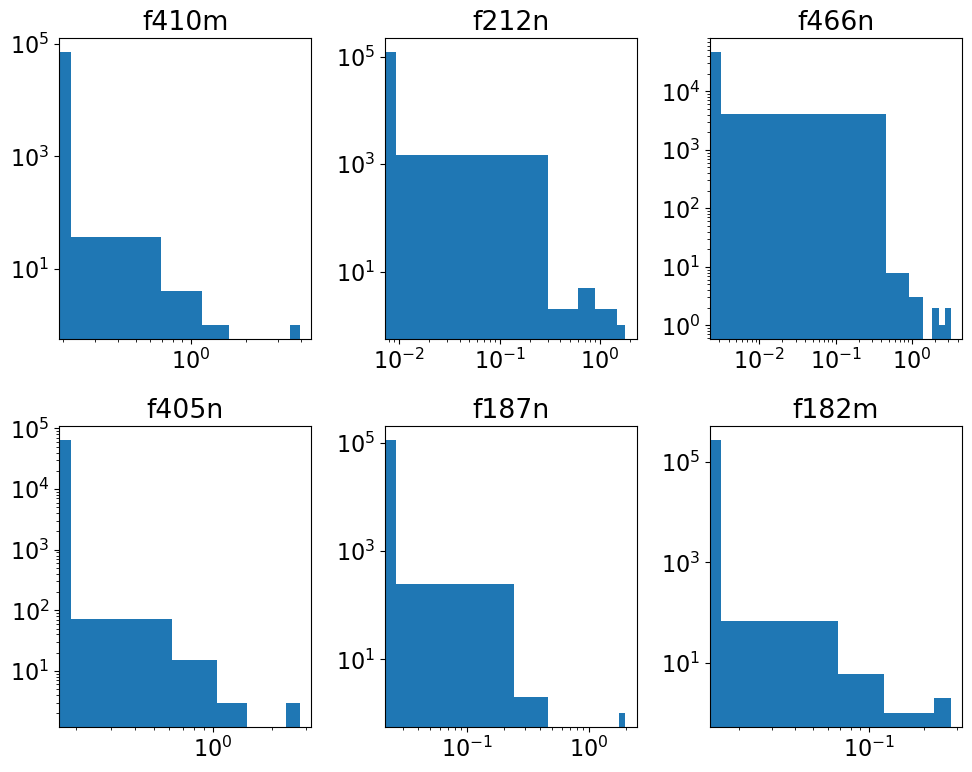

In [10]:
#for ii, tbl in enumerate(tbls):
for ii, filt in enumerate(filternames):
    ax = pl.subplot(2,3,ii+1)
    ax.hist(basetable[f'flux_jy_{filt}'], log=True)
    ax.set_title(filt)
    ax.loglog()
pl.tight_layout()

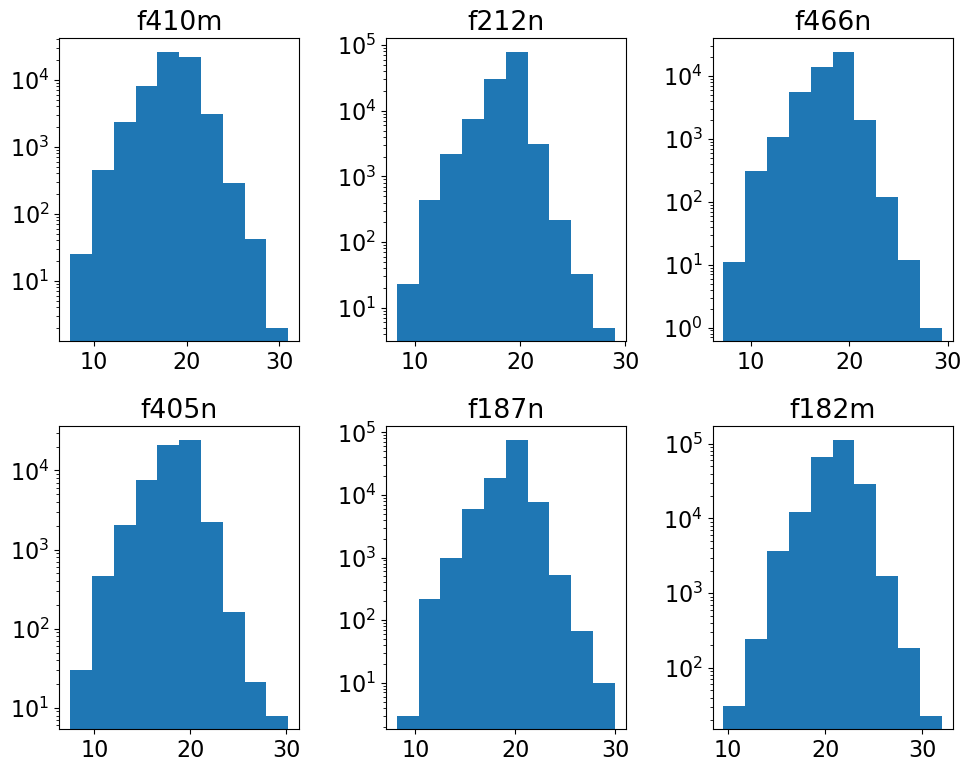

In [11]:
#for ii, tbl in enumerate(tbls):
for ii, filt in enumerate(filternames):
    ax = pl.subplot(2,3,ii+1)
    ax.hist(basetable[f'mag_ab_{filt}'], log=True)
    ax.set_title(filt)
    #ax.loglog()
pl.tight_layout()

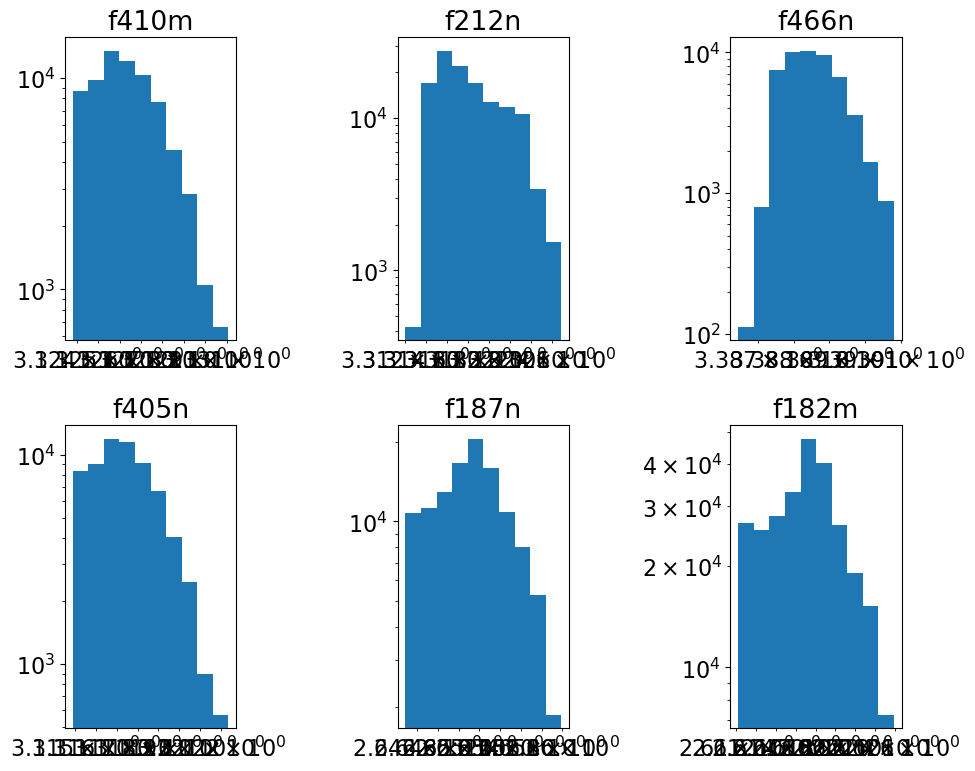

In [12]:
#for ii, tbl in enumerate(tbls):
for ii, filt in enumerate(filternames):
    ax = pl.subplot(2,3,ii+1)
    ax.hist(basetable[f'fwhm_{filt}'], log=True)
    ax.set_title(filt)
    ax.loglog()
pl.tight_layout()

# XMatch Check

In [13]:
fh = fits.open(f'{basepath}/F410M/pipeline/jw02221-o001_t001_nircam_clear-f410m-nrca_i2d.fits')
ww410 = wcs.WCS(fh[1].header)

Set OBSGEO-B to   -20.631897 from OBSGEO-[XYZ].
Set OBSGEO-H to 1526059356.900 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [14]:
# verify that the image has been realigned (these should be different)
fh[1].header['OLCRVAL1'], fh[1].header['CRVAL1']

(266.5356171712705, 266.53558411146)

# Color-magnitude and color-color diagrams

(25.0, 13.0)

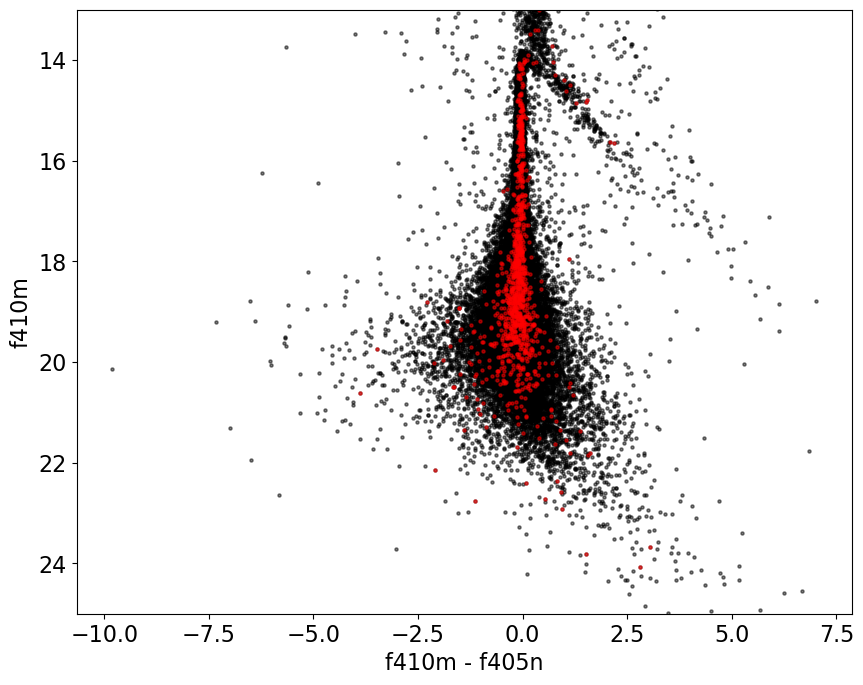

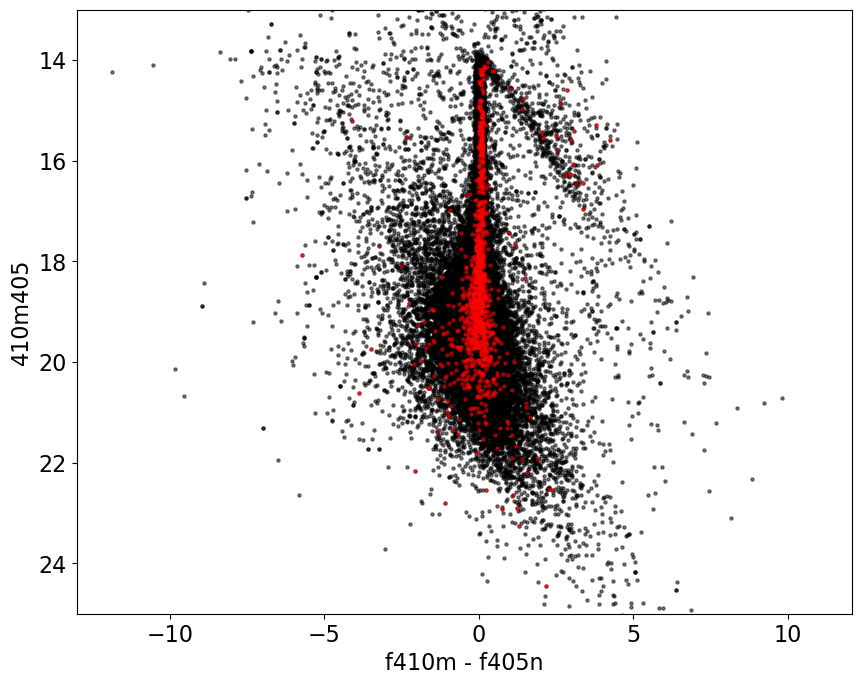

In [15]:
sel = reg.contains(basetable['skycoord_f410m'], ww)
sel &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
pl.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f405n'], basetable['mag_ab_f410m'], s=5, alpha=0.5, c='k')
pl.scatter((basetable['mag_ab_f410m'] - basetable['mag_ab_f405n'])[sel], basetable['mag_ab_f410m'][sel], s=5, alpha=0.5, c='r')
pl.ylim(pl.ylim()[::-1])
pl.xlabel("f410m - f405n")
pl.ylabel("f410m")
pl.ylim(25,13)

pl.figure()
pl.scatter(basetable['mag_ab_410m405'] - basetable['mag_ab_f405n'], basetable['mag_ab_410m405'], s=5, alpha=0.5, c='k')
pl.scatter((basetable['mag_ab_410m405'] - basetable['mag_ab_f405n'])[sel], basetable['mag_ab_410m405'][sel], s=5, alpha=0.5, c='r')
pl.ylim(pl.ylim()[::-1])
pl.xlabel("f410m - f405n")
pl.ylabel("410m405")
pl.ylim(25,13)

(25.0, 14.0)

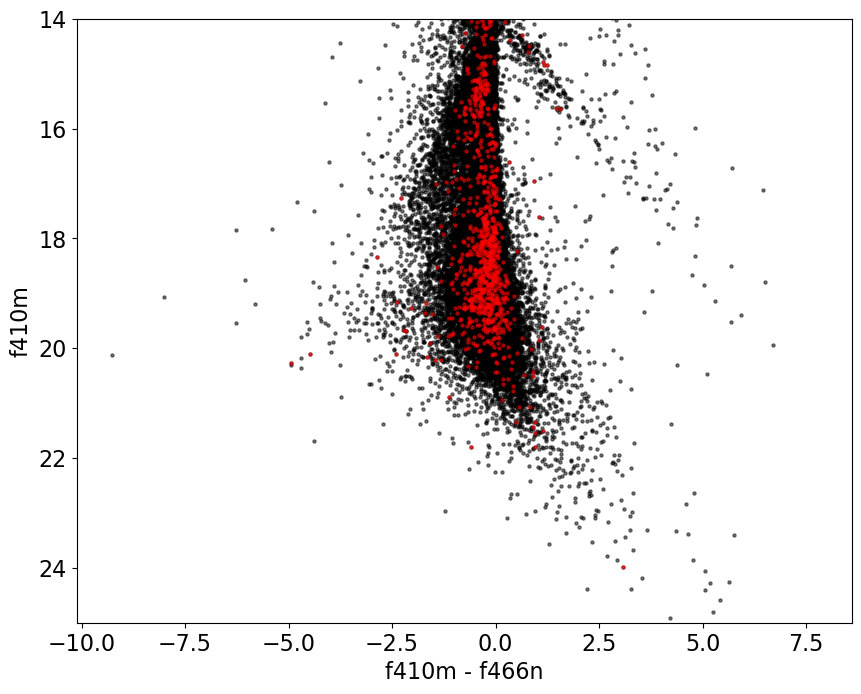

In [16]:
sel = reg.contains(basetable['skycoord_f410m'], ww)
sel &= basetable['sep_f466n'].quantity < 0.1*u.arcsec
pl.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f410m'], s=5, alpha=0.5, c='k')
pl.scatter((basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'])[sel], basetable['mag_ab_f410m'][sel], s=5, alpha=0.5, c='r')
pl.ylim(pl.ylim()[::-1])
pl.xlabel("f410m - f466n")
pl.ylabel("f410m")
pl.ylim(25,14)

(-5.0, 10.0, -5.0, 10.0)

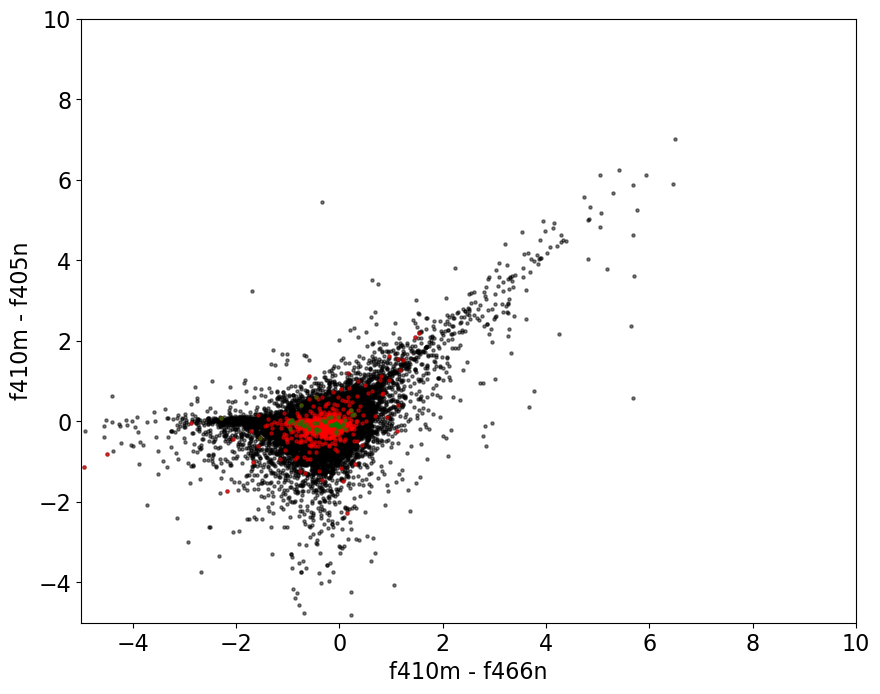

In [17]:
sel = reg.contains(basetable['skycoord_f410m'], ww)
sel &= basetable['sep_f466n'].quantity < 0.1*u.arcsec
sel &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel2 = regzoom.contains(basetable['skycoord_f410m'], ww)
sel2 &= basetable['sep_f466n'].quantity < 0.1*u.arcsec
sel2 &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
pl.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f410m']-basetable['mag_ab_f405n'], s=5, alpha=0.5, c='k')
pl.scatter((basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'])[sel], (basetable['mag_ab_f410m']-basetable['mag_ab_f405n'])[sel], s=5, alpha=0.5, c='r')
pl.scatter((basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'])[sel2], (basetable['mag_ab_f410m']-basetable['mag_ab_f405n'])[sel2], s=5, alpha=0.5, c='g')
pl.ylim(pl.ylim()[::-1])
pl.xlabel("f410m - f466n")
pl.ylabel("f410m - f405n")
pl.axis((-5,10,-5,10))

(-5.0, 10.0, -5.0, 10.0)

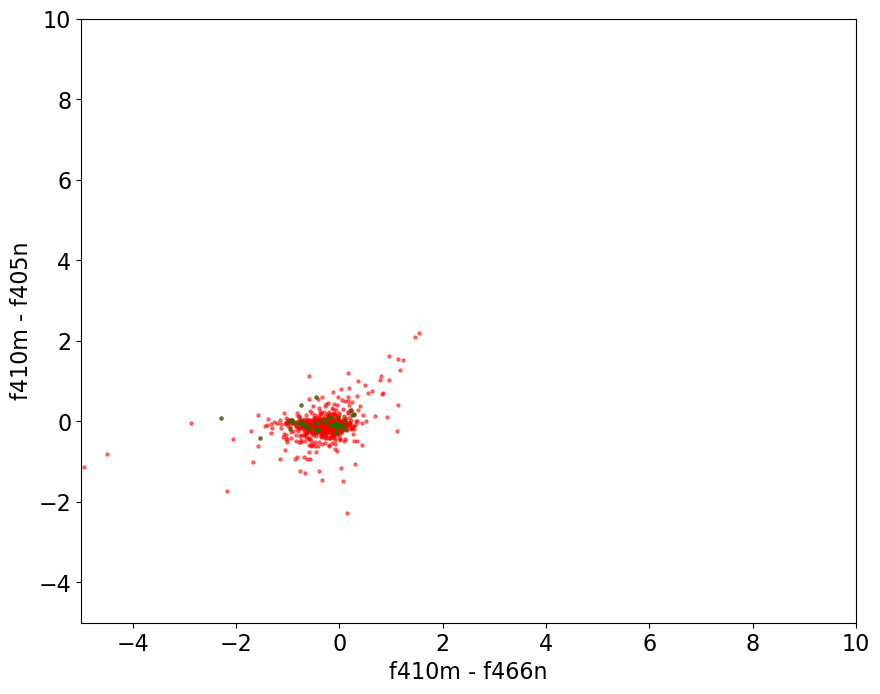

In [18]:
sel = reg.contains(basetable['skycoord_f410m'], ww)
sel &= basetable['sep_f466n'].quantity < 0.1*u.arcsec
sel &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel2 = regzoom.contains(basetable['skycoord_f410m'], ww)
sel2 &= basetable['sep_f466n'].quantity < 0.1*u.arcsec
sel2 &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
#pl.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f410m']-basetable['mag_ab_f405n'], s=5, alpha=0.5, c='k')
pl.scatter((basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'])[sel], (basetable['mag_ab_f410m']-basetable['mag_ab_f405n'])[sel], s=5, alpha=0.5, c='r')
pl.scatter((basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'])[sel2], (basetable['mag_ab_f410m']-basetable['mag_ab_f405n'])[sel2], s=5, alpha=0.5, c='g')
pl.ylim(pl.ylim()[::-1])
pl.xlabel("f410m - f466n")
pl.ylabel("f410m - f405n")
pl.axis((-5,10,-5,10))

In [ ]:
sel = reg.contains(basetable['skycoord_f410m'], ww)
sel &= basetable['sep_f466n'].quantity < 0.1*u.arcsec
sel &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel2 = regzoom.contains(basetable['skycoord_f410m'], ww)
sel2 &= basetable['sep_f466n'].quantity < 0.1*u.arcsec
sel2 &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
pl.scatter(basetable['mag_ab_410m405'] - basetable['mag_ab_f466n'], basetable['mag_ab_410m405']-basetable['mag_ab_f405n'], s=5, alpha=0.5, c='k')
pl.scatter((basetable['mag_ab_410m405'] - basetable['mag_ab_f466n'])[sel], (basetable['mag_ab_410m405']-basetable['mag_ab_f405n'])[sel], s=5, alpha=0.5, c='r')
pl.scatter((basetable['mag_ab_410m405'] - basetable['mag_ab_f466n'])[sel2], (basetable['mag_ab_410m405']-basetable['mag_ab_f405n'])[sel2], s=5, alpha=0.5, c='g')
pl.ylim(pl.ylim()[::-1])
pl.xlabel("f410m linesub - f466n")
pl.ylabel("f410m linesub - f405n")
pl.axis((-5,10,-5,10))

(-5.0, 10.0, -5.0, 10.0)

In [ ]:
sel = reg.contains(basetable['skycoord_f410m'], ww)
sel &= basetable['sep_f182m'].quantity < 0.1*u.arcsec
pl.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f182m'], basetable['mag_ab_f410m'], s=5, alpha=0.5, c='k')
pl.scatter((basetable['mag_ab_f410m'] - basetable['mag_ab_f182m'])[sel], basetable['mag_ab_f410m'][sel], s=5, alpha=0.5, c='r')
pl.xlabel("f410m - f182m")
pl.ylabel("f410m")
pl.ylim(25,14)

In [ ]:
sel = reg.contains(basetable['skycoord_f212n'], ww)
pl.scatter(basetable['mag_ab_f212n'] - basetable['mag_ab_f182m'], basetable['mag_ab_f212n'], s=5, alpha=0.5, c='k')
pl.scatter((basetable['mag_ab_f212n'] - basetable['mag_ab_f182m'])[sel], basetable['mag_ab_f212n'][sel], s=5, alpha=0.5, c='r')
pl.ylim(pl.ylim()[::-1])
pl.xlabel("f212n - f182m")
pl.ylabel("f212n")
pl.ylim(25,14)

In [ ]:
import PIL
import pyavm

In [ ]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_longwave_RGB_unrotated.png')
img = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_longwave_RGB_unrotated.png'))[::-1,:,:]
#wwi = avm.to_wcs(use_full_header=True)
wwi = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

In [ ]:
# This image shows "CO-absorbed" stars as purple
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_stars_rotated.png')
img = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_stars_rotated.png'))[::-1,:,:]
#wwi = avm.to_wcs(use_full_header=True)
wwi = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

In [ ]:
# Show the region cutout selected coordinates on our nrca image
ax = pl.subplot(projection=wwi)
ax.imshow(img)
crds = basetable['skycoord_f410m']
ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('fk5'), marker=',', s=1)

In [ ]:
reg

In [ ]:
# This image shows bra_410 = red: 405, green: 410, blue: 405+410
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_stars_bra_410.png')
img_bra_410 = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_stars_bra_410.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_bra_410 = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

mask = regzoom.to_pixel(wwi_bra_410).to_mask()
slcs,_ = mask.get_overlap_slices(img_bra_410.shape[:2])
#co = np.array([mask.cutout(img_bra_410[:,:,ii]) for ii in range(img_bra_410.shape[2])])
co = img_bra_410[slcs[0], slcs[1], :]

pl.figure(figsize=(20,10))
ax = pl.subplot(1,2,1, projection=wwi_bra_410[slcs])
pl.imshow(co)

crds = basetable['skycoord_f410m']
sel = regzoom.contains(crds, ww410)
sel &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
xx,yy = ww410[slcs].world_to_pixel(crds[sel])

colorby = basetable['flux_f410m']
colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f405n']
#sel = sel & (colorby < -2)

scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'),
                  #edgecolor='r', facecolor='none', marker='s')#r'$\rightarrow$')
                  c=colorby[sel],
                  norm=simple_norm(colorby[sel], stretch='asinh',), cmap='jet_r')
pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')
#pl.colorbar(mappable=scat)
ax.axis()
pl.plot(44,54, 'wx')
wwi_bra_410[slcs].pixel_to_world(45,55)

ax2 = pl.subplot(1,2,2)
ax2.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f405n'], basetable['mag_ab_f410m'], s=2, alpha=0.05, c='k')
ax2.scatter((basetable['mag_ab_f410m'] - basetable['mag_ab_f405n'])[sel], basetable['mag_ab_f410m'][sel], s=10, alpha=0.9,
            c=colorby[sel],
            norm=simple_norm(colorby[sel], stretch='asinh',), cmap='jet_r'
           )
ax2.axvline(-0.75, linestyle='--', color='r', alpha=0.5)
ax2.axvline(-1.25, linestyle='--', color='r', alpha=0.5)
ax2.set_ylim(pl.ylim()[::-1])
ax2.set_xlabel("f410m - f405")
ax2.set_ylabel("f410m")
ax2.set_ylim(25,14)
pl.title("F410 v F410-F405 colored by F410-F405")

In [ ]:
(~bad).sum(), bad.sum(), bad.mask.sum(), len(bad), len(basetable) # Feb 11, 2023: where did the other 250,000 sources go?

In [ ]:
# How many stars are brighter than 18.5 mag (in the OK long, slightly blue samples?)
(basetable['mag_ab_f466n'][oklong] < 18.5).sum(), (basetable['mag_ab_f466n'][slightly_blue_410_466] < 18.5).sum(),

In [ ]:
# How many stars are brighter than 20 mag (in the OK long, slightly blue samples?)
(basetable['mag_ab_f410m'][oklong] < 20).sum(), (basetable['mag_ab_f410m'][slightly_blue_410_466] < 20).sum(),

In [ ]:
fig = cmds_withiso(colors=[('410m405', '405m410'), ('f410m', 'f405n')],
                   fig=pl.figure(figsize=(12,10)),
                   sel=neg_405m410,
                   alpha_k=0.2,
                   markersize=3,
                   exclude=(any_saturated | ~oksep | magerr_gtpt1 | basetable['mag_ab_f405n'].mask | basetable['mag_ab_f410m'].mask | badqflong | badfracfluxlong | badspreadlong),
                   iso=False,  
                   ext=None,
    );
fig.axes[0].axis([-7, 8, 25, 13]);
fig.axes[1].axis([-7, 4, 22, 13]);

fig.savefig(f'{basepath}/paper_figures/BrA_CMDs_absorptionstars.pdf', bbox_inches='tight')

In [ ]:
# Examine these in SEDsOfHexcesses.ipynb
fig = cmds_withiso(colors=[('410m405', '405m410'), ('f410m', 'f405n')],
                   fig=pl.figure(figsize=(12,10)),
                   sel=blue_405_410b,
                   alpha_k=0.2,
                   markersize=3,
                   exclude=(any_saturated | ~oksep | magerr_gtpt1 |
                            basetable['mag_ab_f405n'].mask | basetable['mag_ab_f410m'].mask |
                            badqflong | badfracfluxlong | badspreadlong),
                   iso=False,  
                   ext=None,
    );
fig.axes[0].axis([-7, 8, 25, 13]);
fig.axes[1].axis([-4, 2, 22, 13]);
pl.suptitle("Blue F405N-F410M on F405N-F410M\nWhy are there so few stars at F405N>19?")

fig.savefig(f'{basepath}/paper_figures/BrA_CMDs.pdf', bbox_inches='tight')

In [ ]:
# to match CO2 vs CO ice ...
sel = reg.contains(basetable['skycoord_f410m'], ww)
#sel &= basetable['sep_f466n'].quantity < 0.1*u.arcsec
#sel &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel &= ~bad
sel2 = regzoom.contains(basetable['skycoord_f410m'], ww)
#sel2 &= basetable['sep_f466n'].quantity < 0.1*u.arcsec
#sel2 &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
sel2 &= ~bad
pl.scatter((basetable['mag_ab_f212n'] - basetable['mag_ab_f410m'])[~bad],
           (basetable['mag_ab_f410m']-basetable['mag_ab_f466n'])[~bad], s=1, alpha=0.5, c='k')
pl.scatter((basetable['mag_ab_f212n'] - basetable['mag_ab_f410m'])[sel],
           (basetable['mag_ab_f410m']-basetable['mag_ab_f466n'])[sel], s=5, alpha=0.5, c='r')
pl.scatter((basetable['mag_ab_f212n'] - basetable['mag_ab_f410m'])[sel2],
           (basetable['mag_ab_f410m']-basetable['mag_ab_f466n'])[sel2], s=5, alpha=0.5, c='g')
#pl.ylim(pl.ylim()[::-1])
pl.xlabel("f212n - f410m")
pl.ylabel("f410m - f466n")
pl.axis((-2,4,-2,1))
pl.title("Correlation between F212-F410 reddening & F410-F466 blueing\nred points are region selections");

In [ ]:
fig = cmds_withiso(colors=[('f182m', 'f410m'), ('f187n', 'f405n')],
                   fig=pl.figure(figsize=(12,10)),
                   sel=blue_BrA_and_PaA,
                   alpha_k=0.2,
                   markersize=3,
                   exclude=(any_saturated | ~oksep | magerr_gtpt1 |
                            basetable['mag_ab_f405n'].mask | basetable['mag_ab_f410m'].mask |
                            badqflong | badfracfluxlong | badspreadlong),
                   iso=False,  
                   ext=None,
    );
#fig.axes[0].axis([-2, 3.5, 22, 13]);
#fig.axes[1].axis([-4, 2, 21.5, 13]);

# fig.savefig(f'{basepath}/paper_figures/.pdf', bbox_inches='tight')

In [ ]:
fig = cmds_withiso(colors=[('f182m', 'f187n'), ('f410m', 'f405n')],
                   fig=pl.figure(figsize=(12,10)),
                   sel=blue_BrA_and_PaA,
                   alpha_k=0.2,
                   markersize=3,
                   exclude=(any_saturated | ~oksep | magerr_gtpt1 |
                            basetable['mag_ab_f405n'].mask | basetable['mag_ab_f410m'].mask |
                            badqflong | badfracfluxlong | badspreadlong),
                   iso=False,  
                   ext=None,
    );
fig.axes[0].axis([-2, 3.5, 22, 13]);
fig.axes[1].axis([-4, 2, 21.5, 13]);

fig.savefig(f'{basepath}/paper_figures/BrA_PaA_CMDs.pdf', bbox_inches='tight')

In [ ]:
fig = cmds_withiso(colors=[('182m187', '187m182'), ('410m405', '405m410')],
                   fig=pl.figure(figsize=(12,10)),
                   sel=blue_BrA_and_PaA,
                   alpha_k=0.2,
                   markersize=3,
                   exclude=(any_saturated | ~oksep | magerr_gtpt1 | basetable['mag_ab_f405n'].mask |
                            basetable['mag_ab_f410m'].mask | badqflong | badfracfluxlong | badspreadlong),
                   iso=False,  
                   ext=None,
    );
fig.axes[0].axis([-7, 5, 25, 15.5]);
fig.axes[1].axis([-7, 7, 24, 13]);

fig.savefig(f'{basepath}/paper_figures/BrA_PaA_subtracted_CMDs.pdf', bbox_inches='tight')

In [ ]:
ext = CT06_MWGC()

In [ ]:
fig = cmds_withiso(colors=[('187m182', '405m410'), ('410m405', '182m187')],
                   fig=pl.figure(figsize=(12,10)),
                   sel=blue_BrA_and_PaA,
                   alpha_k=0.2,
                   markersize=3,
                   exclude=(any_saturated | ~oksep | magerr_gtpt1 |
                            (~basetable['good_f405n']) | (~basetable['good_f410m'])),
                            #basetable['mag_ab_f405n'].mask | basetable['mag_ab_f410m'].mask |
                            #badqflong | badfracfluxlong | badspreadlong),
                   iso=False,  
                   ext=None,
    );
fig.axes[0].axis([-7, 5, 25, 15.5]);
fig.axes[1].axis([-7, 7, 24, 13]);
fig.axes[0].axvline(1.56, zorder=-5, label='PaA/BrA intrinsic') # -2.5*np.log10(4.23)
fig.axes[0].axvline(1.56 + ext(1.87*u.um)*30 - ext(4.05*u.um)*30, zorder=-5,
                    label='PaA/BrA A$_V=30$')


fig.savefig(f'{basepath}/paper_figures/BrA_vs_PaA_subtracted_CMDs.pdf', bbox_inches='tight')

In [ ]:
fig = cmds_withiso(colors=[('f187n', 'f405n'), ('f182m', 'f410m')],
                   fig=pl.figure(figsize=(12,10)),
                   sel=blue_BrA_and_PaA,
                   alpha_k=0.2,
                   markersize=3,
                   exclude=any_saturated | ~oksep | magerr_gtpt1 | basetable['mag_ab_f405n'].mask | basetable['mag_ab_f410m'].mask | badqflong | badfracfluxlong | badspreadlong,
                   iso=False,  
                   ext=None,
    );
fig.axes[0].axis([-4, 5, 22, 14]);
fig.axes[1].axis([-4, 7, 24.5, 14]);
fig.axes[0].axvline(1.56, zorder=-5) # -2.5*np.log10(4.23)
fig.savefig(f'{basepath}/paper_figures/BrA_vs_PaA_unsubtracted_CMDs.pdf', bbox_inches='tight')

In [ ]:
#blue_410_466 = (basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']) < -1.25
pl.scatter(crds.ra[blue_410_466], crds.dec[blue_410_466])
#blue_410_405 = (basetable['mag_ab_f410m'] - basetable['mag_ab_f405n']) < -2.00
pl.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none')
pl.scatter(crds.ra[blue_405_410], crds.dec[blue_405_410], edgecolors='red', facecolors='none')
pl.scatter(crds.ra[blue_405_410b], crds.dec[blue_405_410b], edgecolors='red', facecolors='none', s=5)

In [ ]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))


pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']
ax.scatter(crds.ra[blue_410_466], crds.dec[blue_410_466], transform=ax.get_transform('world'), edgecolors=(0.3, 0.5, 0.8), facecolors='none')
ax.scatter(crds.ra[blue_405_410b], crds.dec[blue_405_410b],
           s=5,
           edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))



In [ ]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))


pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']
#ax.scatter(crds.ra[blue_410_466], crds.dec[blue_410_466], transform=ax.get_transform('world'), edgecolors=(0.3, 0.5, 0.8), facecolors='none')
ax.scatter(crds.ra[blue_405_410], crds.dec[blue_405_410],
           s=5,
           edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))



In [ ]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))


pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']
#ax.scatter(crds.ra[blue_410_466], crds.dec[blue_410_466], transform=ax.get_transform('world'), edgecolors=(0.3, 0.5, 0.8), facecolors='none')
ax.scatter(crds.ra[blue_405_410b], crds.dec[blue_405_410b],
           s=5,
           edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))



In [ ]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))


pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']
#ax.scatter(crds.ra[blue_410_466], crds.dec[blue_410_466], transform=ax.get_transform('world'), edgecolors=(0.3, 0.5, 0.8), facecolors='none')
ax.scatter(crds.ra[blue_BrA_and_PaA], crds.dec[blue_BrA_and_PaA],
           s=5,
           edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.scatter(crds.ra[blue_187_182], crds.dec[blue_187_182],
           s=5,
           edgecolors='green', facecolors='none', transform=ax.get_transform('world'))
ax.scatter(crds.ra[blue_405_410b], crds.dec[blue_405_410b],
           s=5,
           edgecolors='red', facecolors='none', transform=ax.get_transform('world'))


In [ ]:
import warnings

In [ ]:
pl.figure(figsize=(12,12))
mask = reg.to_pixel(ww410).to_mask()
slcs,_ = mask.get_overlap_slices(fh['SCI'].data.shape)
ax = pl.subplot(projection=ww410[slcs])
co = mask.cutout(fh['SCI'].data)
co = fh['SCI'].data[slcs]
ax.imshow(co, cmap='gray', norm=simple_norm(co, stretch='log', max_percent=99.95), origin='lower')
crds = basetable['skycoord_f410m']
sel = reg.contains(crds, ww410)
xx,yy = ww410[slcs].world_to_pixel(crds[sel])

colorby = basetable['flux_f410m']
colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f405n']

scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'),
                  c=colorby[sel],
                  norm=simple_norm(colorby[sel], stretch='asinh',), cmap='jet')
pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_major_formatter('dd:mm:ss.sss')
lat.set_major_formatter('dd:mm:ss.sss')
lon.set_ticks(spacing=0.1 * u.arcsec)
lat.set_ticks(spacing=0.1 * u.arcsec)
pl.title("F410M-F405N colors on F410M image (all sources)")

In [ ]:
pl.figure(figsize=(12,12))
mask = reg.to_pixel(ww410).to_mask()
slcs,_ = mask.get_overlap_slices(fh['SCI'].data.shape)
ax = pl.subplot(projection=ww410)
#ax = pl.gca()
co = fh['SCI'].data
ax.imshow(co, cmap='gray', norm=simple_norm(co, stretch='log', max_percent=99.95), origin='lower')
crds = basetable['skycoord_f410m']
#crds = tbls[0]['skycoord']
sel = reg.contains(crds, ww410)
xx,yy = ww410[slcs].world_to_pixel(crds[sel])
#scat = ax.scatter(xx, yy, c=basetable['flux_f410m'][sel],
#                  norm=simple_norm(basetable['flux_f410m'][sel], stretch='log',), cmap='jet')
scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'), c=basetable['flux_f410m'][sel],
           norm=simple_norm(basetable['flux_f410m'][sel], stretch='log',), cmap='jet')
pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_major_formatter('dd:mm:ss.sss')
lat.set_major_formatter('dd:mm:ss.sss')
lon.set_ticks(spacing=1 * u.arcsec)
lat.set_ticks(spacing=1 * u.arcsec)
pl.title("F410M colors on F410M image (all sources in region, logscale)")

In [ ]:
pl.figure(figsize=(12,12))
mask = reg.to_pixel(ww410).to_mask()
slcs,_ = mask.get_overlap_slices(fh['SCI'].data.shape)
ax = pl.subplot(projection=ww410)
#ax = pl.gca()
co = fh['SCI'].data
ax.imshow(co, cmap='gray', norm=simple_norm(co, stretch='log', max_percent=99.95), origin='lower')
crds = basetable['skycoord_f410m']
#crds = tbls[0]['skycoord']
sel = reg.contains(crds, ww410)
xx,yy = ww410[slcs].world_to_pixel(crds[sel])
#scat = ax.scatter(xx, yy, c=basetable['flux_f410m'][sel],
#                  norm=simple_norm(basetable['flux_f410m'][sel], stretch='log',), cmap='jet')
scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'), c=basetable['flux_f410m'][sel],
           norm=simple_norm(basetable['flux_f410m'][sel], stretch='log',), cmap='jet')
pl.draw()
colors = scat.get_facecolors()
scat.set_edgecolors(colors)
scat.set_facecolors('none')

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_major_formatter('dd:mm:ss.sss')
lat.set_major_formatter('dd:mm:ss.sss')
lon.set_ticks(spacing=1 * u.arcsec)
lat.set_ticks(spacing=1 * u.arcsec)
ax.axis((676,1043,1119,1515))
pl.title("F410M colors on F410M image (all sources, zoom, logscale)");

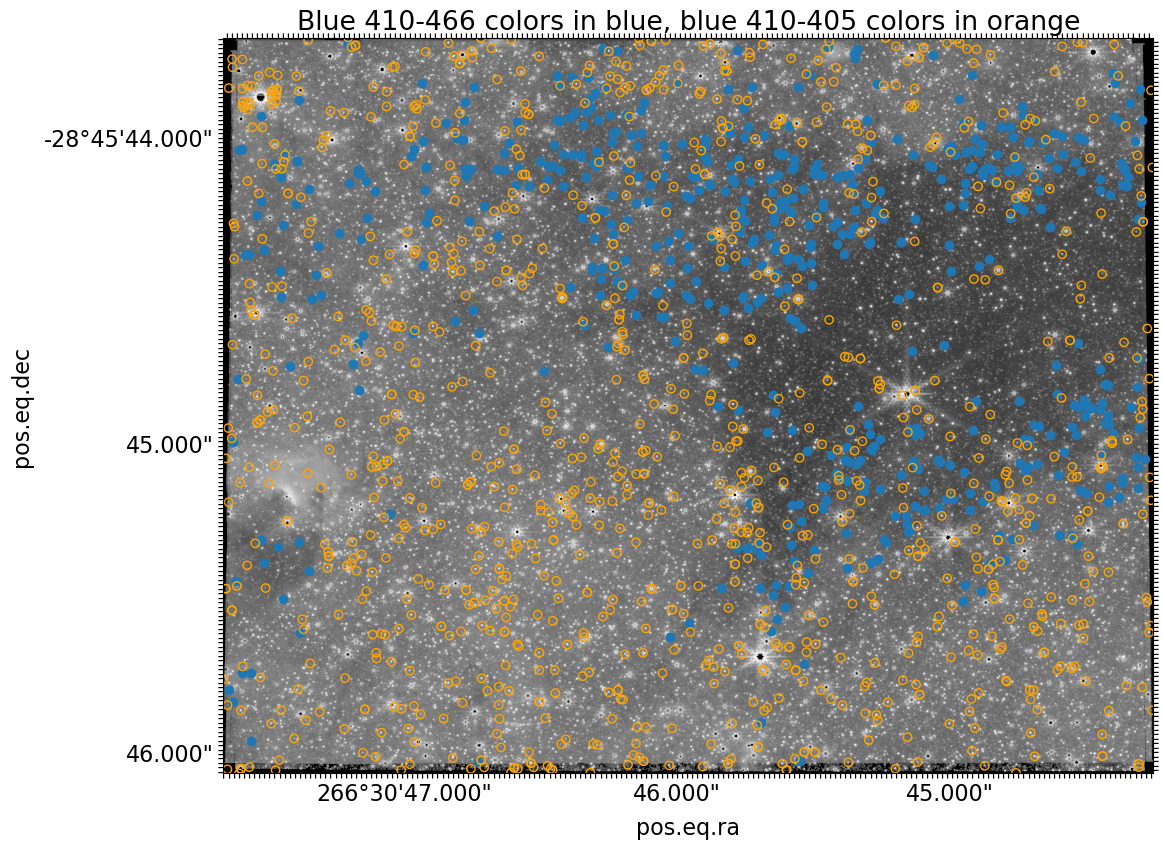

In [49]:
pl.figure(figsize=(12,12))
mask = reg.to_pixel(ww410).to_mask()
slcs,_ = mask.get_overlap_slices(fh['SCI'].data.shape)
ax = pl.subplot(projection=ww410)
#ax = pl.gca()
co = fh['SCI'].data
ax.imshow(co, cmap='gray', norm=simple_norm(co, stretch='log', min_percent=1.5, max_percent=99.95), origin='lower')
crds = basetable['skycoord_f410m']
#crds = tbls[0]['skycoord']
sel = reg.contains(crds, ww410)
xx,yy = ww410[slcs].world_to_pixel(crds[sel])
##scat = ax.scatter(xx, yy, c=basetable['flux_f410m'][sel],
##                  norm=simple_norm(basetable['flux_f410m'][sel], stretch='log',), cmap='jet')
#scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'), c=basetable['flux_f410m'][sel],
#           norm=simple_norm(basetable['flux_f410m'][sel], stretch='log',), cmap='jet')
#pl.draw()
#colors = scat.get_facecolors()
#scat.set_edgecolors(colors)
#scat.set_facecolors('none')

# defined above (only define once) blue_410_466 = (basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']) < -1.25
pl.scatter(crds.ra[blue_410_466], crds.dec[blue_410_466], transform=ax.get_transform('world'))
# defined above (only define once) blue_410_405 = (basetable['mag_ab_f410m'] - basetable['mag_ab_f405n']) < -1.00
pl.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange',
           facecolors='none', transform=ax.get_transform('world'))

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_major_formatter('dd:mm:ss.sss')
lat.set_major_formatter('dd:mm:ss.sss')
lon.set_ticks(spacing=1 * u.arcsec)
lat.set_ticks(spacing=1 * u.arcsec)
pl.title("Blue 410-466 colors in blue, blue 410-405 colors in orange");

# Select stars by color

Need to determine uncertainty!

In [50]:
basetable[:5]

<Table length=5>
             skycoord_ref              sep_f410m id_f410m             skycoord_f410m                  x_f410m             y_f410m       flux_f410m ... mag_ab_187m182 good_f410m good_f212n good_f466n good_f405n good_f187n good_f182m
               deg,deg                    deg                            deg,deg                                                                   ...                                                                                 
               SkyCoord                 float64   int64                  SkyCoord                     float64             float64        float32   ...    float32        bool       bool       bool       bool       bool       bool   
-------------------------------------- --------- -------- -------------------------------------- ------------------ ------------------- ---------- ... -------------- ---------- ---------- ---------- ---------- ---------- ----------
 266.5132311975062,-28.762289398177817       0.0        0  266.5132311975062,-28.762289398177817 28.375068838898457              -0.499  222451.31 ...       21.15284      False       True         --         --       True       True
 266.5132243847316,-28.761925259221364       0.0        1  266.5132243847316,-28.761925259221364  49.21671658754349              -0.499  436231.62 ...      18.803612      False      False         --      False         --         --
266.51325056364357,-28.761605143488403       0.0        2 266.51325056364357,-28.761605143488403  67.51221227645874   1.114571452140808 -177225.38 ...       19.90377      False       True         --         --         --      False
266.51313405315733,-28.756452324010674       0.0        3 266.51313405315733,-28.756452324010674 362.45255237817764 0.10583467036485672 -13117.467 ...             --      False       True         --         --       True       True
  266.5130887035334,-28.75467264658356       0.0        4   266.5130887035334,-28.75467264658356 464.32305440306664              -0.499  117294.52 ...      20.174988      False       True         --         --       True       True

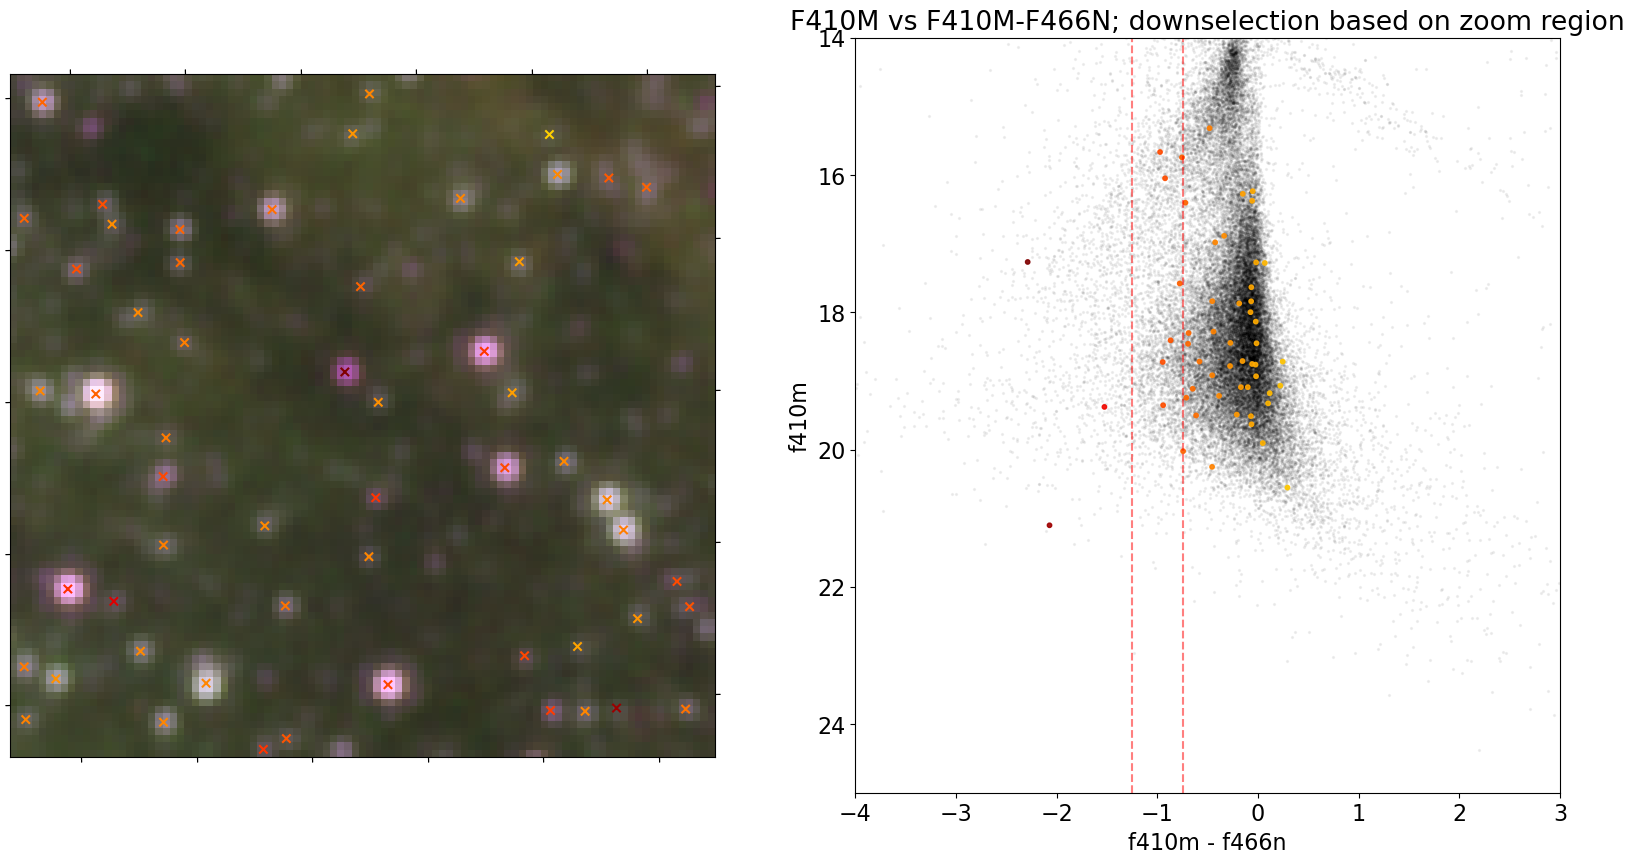

In [51]:
mask = regzoom.to_pixel(wwi).to_mask()
slcs,_ = mask.get_overlap_slices(img.shape[:2])
#co = np.array([mask.cutout(img[:,:,ii]) for ii in range(img.shape[2])])
co = img[slcs[0], slcs[1], :]

pl.figure(figsize=(20,10))
ax = pl.subplot(1,2,1, projection=wwi[slcs])
pl.imshow(co)

crds = basetable['skycoord_f410m']
sel = regzoom.contains(crds, ww410)
sel &= basetable['sep_f405n'].quantity < 0.1*u.arcsec
xx,yy = ww410[slcs].world_to_pixel(crds[sel])

colorby = basetable['flux_f410m']
colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f405n']
colorby = basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']
#sel = sel & (colorby < -2)

# not entirely clear what this was intended to do...
# scat = ax.scatter(crds.ra[sel], crds.dec[sel], transform=ax.get_transform('world'),
#                   #edgecolor='r', facecolor='none', marker='s')#r'$\rightarrow$')
#                   c=colorby[sel],
#                   norm=simple_norm(colorby[sel], stretch='asinh',), cmap='jet_r')
# pl.draw()
# colors = scat.get_facecolors()
# scat.set_edgecolors(colors)
# scat.set_facecolors('none')
#pl.colorbar(mappable=scat)
axlims = ax.axis()

# show the maximum detections
sel2 = regzoom.contains(basetable['skycoord_f410m'], ww410)
ax.scatter(basetable['skycoord_f410m'].ra[sel2],
           basetable['skycoord_f410m'].dec[sel2],
           marker='x',
           #color='w',
           c=colorby[sel2],
           norm=simple_norm(colorby[sel2], stretch='asinh',), cmap='jet_r',
           transform=ax.get_transform('world'))
ax.axis(axlims)

ax2 = pl.subplot(1,2,2)
ax2.scatter(basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'], basetable['mag_ab_f410m'], s=2, alpha=0.05, c='k')
ax2.scatter((basetable['mag_ab_f410m'] - basetable['mag_ab_f466n'])[sel], basetable['mag_ab_f410m'][sel], s=10, alpha=0.9,
            c=colorby[sel],
            norm=simple_norm(colorby[sel], stretch='asinh',), cmap='jet_r'
           )
# show two possible thresholds to use
ax2.axvline(-0.75, linestyle='--', color='r', alpha=0.5)
ax2.axvline(-1.25, linestyle='--', color='r', alpha=0.5)
ax2.set_ylim(pl.ylim()[::-1])
ax2.set_xlabel("f410m - f466n")
ax2.set_ylabel("f410m")
ax2.set_ylim(25,14)
ax2.set_xlim(-4, 3)
pl.title("F410M vs F410M-F466N; downselection based on zoom region");

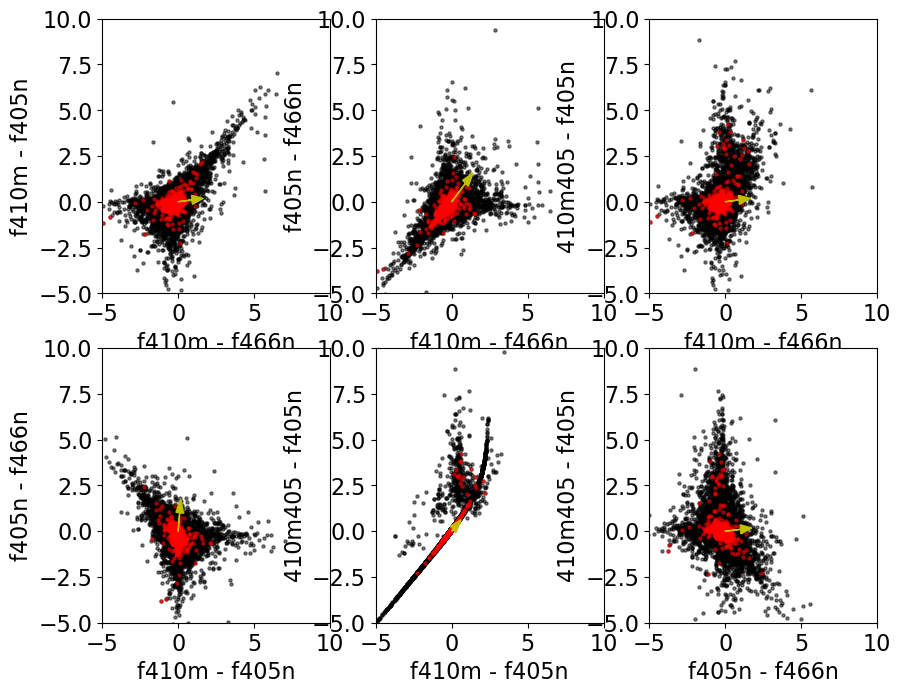

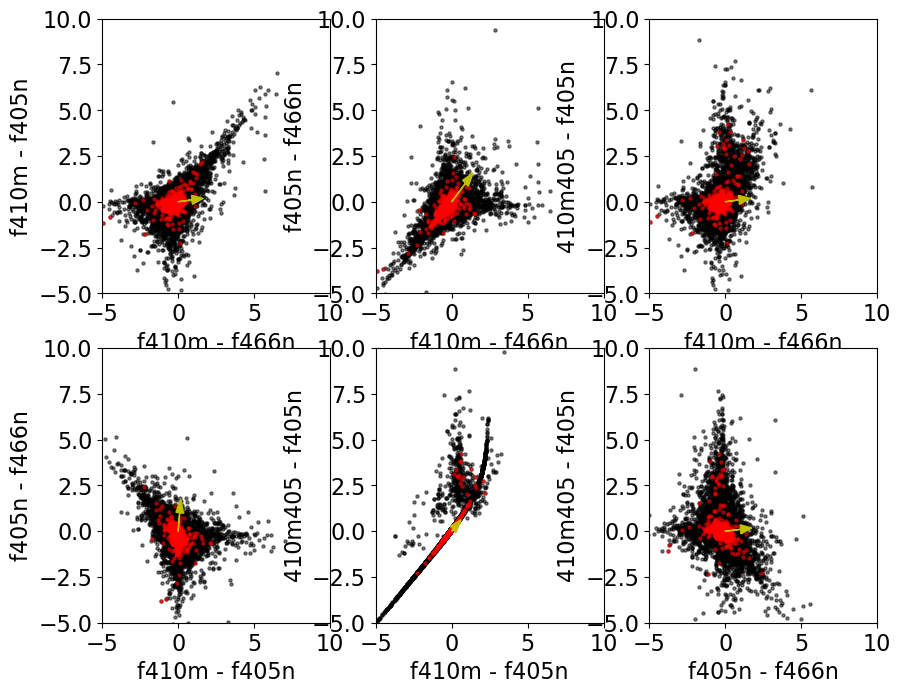

<Figure size 1000x800 with 0 Axes>

In [52]:
ccds()

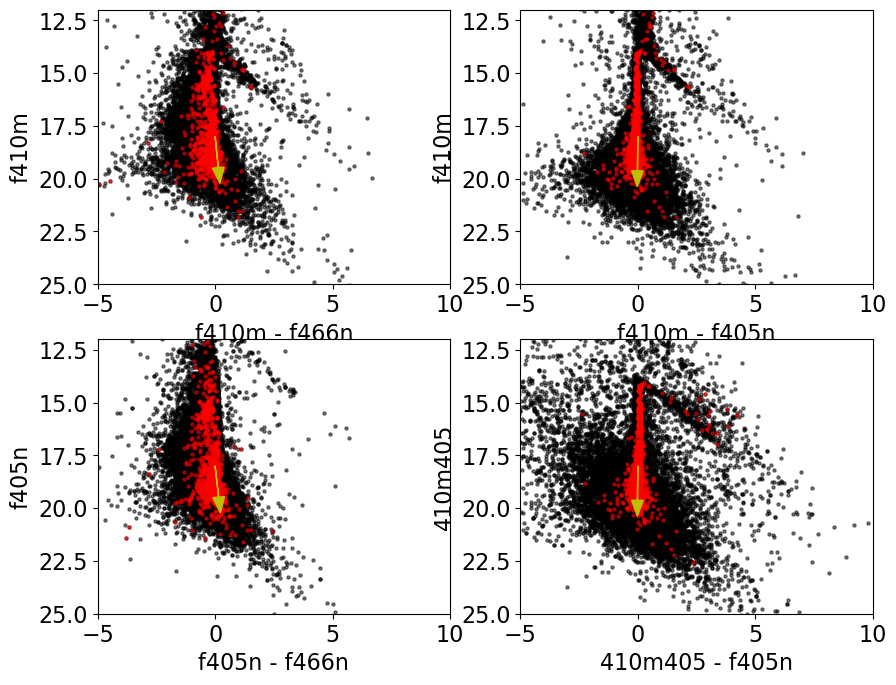

<Figure size 1000x800 with 0 Axes>

In [53]:
cmds();

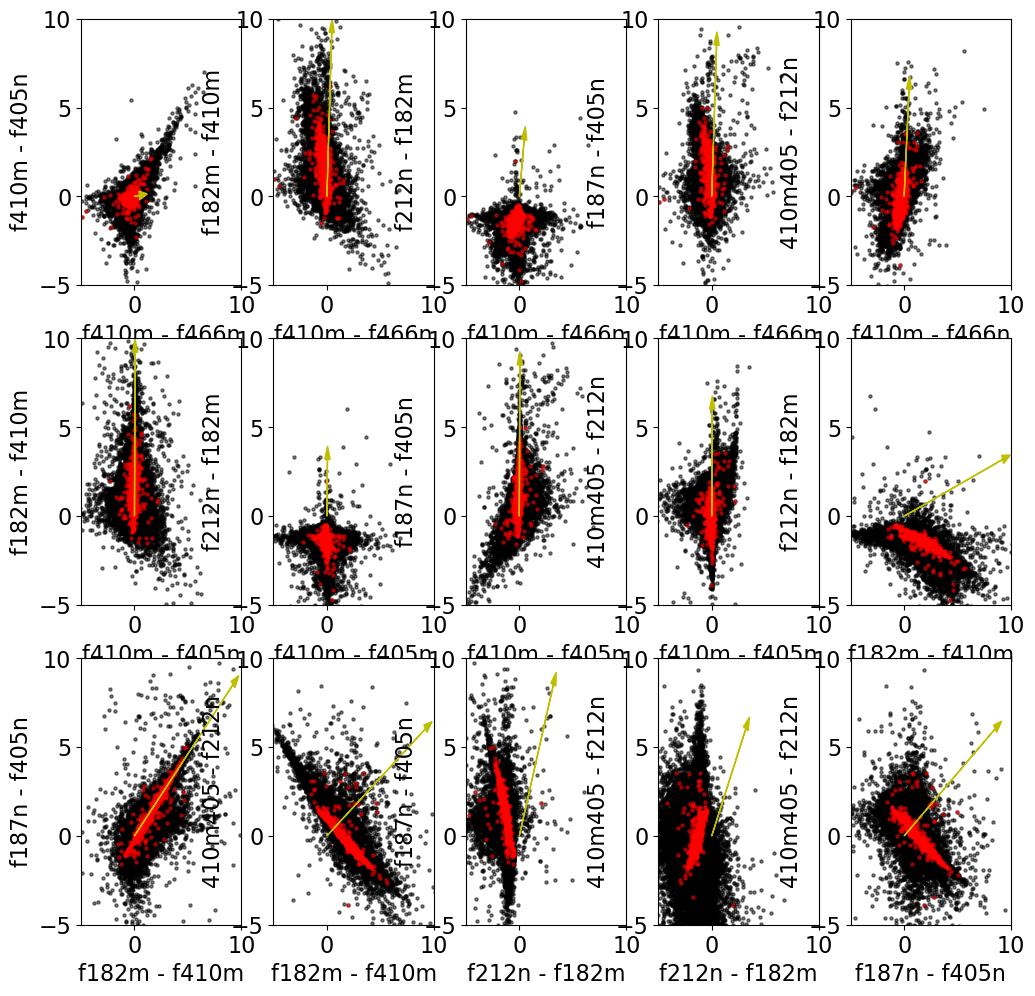

<Figure size 1000x800 with 0 Axes>

In [54]:
ccds(colors=[('f410m', 'f466n'), ('f410m', 'f405n'), ('f182m', 'f410m'), ('f212n', 'f182m'), ('f187n', 'f405n'), ('410m405', 'f212n')],
fig=pl.figure(figsize=(12,12)),
     extvec_scale=100
    );

In [ ]:
cmds(colors=[('f410m', 'f466n'), ('f410m', 'f405n'), ('f182m', 'f410m'), ('f212n', 'f182m'), ('f187n', 'f405n'), ('410m405', 'f212n')],
fig=pl.figure(figsize=(12,12))
    );

In [ ]:
ccds(colors=[('f410m', 'f466n'), ('f410m', 'f405n'), ('f182m', 'f410m'), ('f212n', 'f182m'), ('f187n', 'f405n'), ('410m405', 'f212n')],
     fig=pl.figure(figsize=(12,12)),
     sel=blue_410_466,
    );

In [ ]:
cmds(colors=[('f410m', 'f466n'), ('f410m', 'f405n'), ('f182m', 'f410m'), ('f212n', 'f182m'), ('f187n', 'f405n'), ('410m405', 'f212n')],
     fig=pl.figure(figsize=(12,12)),
     sel=blue_410_466,
    );

# Try to measure extinction

Need isochrones.

From

 * https://waps.cfa.harvard.edu/MIST/
 * http://stev.oapd.inaf.it/cgi-bin/cmd
 * No: only very very old stars http://stellar.dartmouth.edu/models/isolf_new.html
 * no web interface http://www.astro.yale.edu/yapsi/
 * older models http://astro.df.unipi.it/stellar-models/index.php


use isochrones.py

In [ ]:
from astropy.table import Table

In [ ]:
mist = Table.read(f'{basepath}/isochrones/MIST_iso_633a08f2d8bb1.iso.cmd',
                  header_start=12, data_start=13, format='ascii', delimiter=' ', comment='#')
mist['410M405'] = mist['F410M']
mist['405M410'] = mist['F405N']

In [ ]:
padova = Table.read(f'{basepath}/isochrones/padova_isochrone_package.dat',
                    header_start=14, data_start=15, format='ascii', delimiter=' ', comment='#')

In [ ]:
mist[:5]

In [ ]:
padova[:5]

In [ ]:
agesel = mist['log10_isochrone_age_yr'] == 5
pl.scatter(mist['F410M'][agesel] - mist['F466N'][agesel], mist['F410M'][agesel])
pl.xlabel("F410M-F466N")
pl.ylabel("F410M")
agesel.sum()

# Extinction values

In [ ]:
ext = RRP89_MWGC()
ext(2.2*u.um), ext(4.665*u.um)

In [ ]:
# Nogueras-Lara obtain A_H / A_K = 1.84
ext = RRP89_MWGC()
ext(1.6*u.um) / ext(2.2*u.um), ext(4.1*u.um)/ext(1.82*u.um), ext(4.665*u.um)

In [ ]:
# Nogueras-Lara obtain A_H / A_K = 1.84
ext = F11_MWGC()
ext(1.6*u.um) / ext(2.2*u.um), ext(4.1*u.um)/ext(1.82*u.um), ext(4.665*u.um)

In [ ]:
# Nogueras-Lara obtain A_H / A_K = 1.84
ext = CT06_MWGC()
ext(1.6*u.um) / ext(2.2*u.um), ext(4.1*u.um)/ext(1.82*u.um), ext(4.665*u.um)

In [ ]:
(mist['F182M']-mist['F410M'])[mist['log10_isochrone_age_yr'] == 5].max()

In [ ]:
cmds_withiso(colors=[('f466n', 'f410m',), ('f466n', '410m405'), ('410m405', '405m410'), ('f410m', 'f405n'), ('f410m', 'f182m', ), ('f212n', 'f182m' ), ('f405n', 'f187n',), ],
     fig=pl.figure(figsize=(12,12)),
     sel=blue_410_466 & ~any_saturated & ~magerr_gtpt1,
     alpha_k=0.1,
     exclude=any_saturated | ~oksep | magerr_gtpt1
    );

In [ ]:
ccds_withiso(colors=[('f466n', 'f410m',), ('f466n', '410m405'), ('410m405', '405m410'), ('f410m', 'f405n'), ('f410m', 'f182m', ), ('f212n', 'f182m' ), ('f405n', 'f187n',), ],
     fig=pl.figure(figsize=(12,12)),
     sel=blue_410_466 & ~any_saturated & ~badblue,
     exclude=any_saturated | ~oksep | magerr_gtpt1
    );
pl.tight_layout()

# Color-magnitude diagrams with "final" selection of CO-blued sources

Use this plot to assess:

 1) Limiting magnitude of blue selected objects (seen in plot below)
 2) Extinction?

In [ ]:
cmds_withiso(colors=[('f466n', 'f410m',), ('f466n', '410m405'), ('410m405', '405m410'), ('f410m', 'f405n'), ('410m405', 'f182m', ), ('f212n', 'f182m' ), ('f405n', 'f187n',), ('f212n', '410m405') ],
     fig=pl.figure(figsize=(12,12)),
     sel=blue_410_466 & ~any_saturated,# & ~badblue, # "badblue" isn't really bad any more?
     alpha_k=0.05,
     markersize=1,
     exclude=any_saturated | ~oksep | magerr_gtpt1
    );

In [ ]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

img_narrow = img_narrow.swapaxes(0,1)
wwi_narrow = wwi_narrow.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']
ax.scatter(
    crds.dec[blue_BrA_and_PaA],
    crds.ra[blue_BrA_and_PaA],
    transform=ax.get_transform('world'),
    marker='x', facecolors=(0.95, 0.5, 0),
    s=10,
    #markeredgewidth=0.5,
    # for non-x facecolors='none'
    #edgecolors=(0.3, 0.5, 0.8), 
);
#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
lon.set_major_formatter('dd:mm:ss.ss')
lat.set_major_formatter('dd:mm:ss.ss')
#lon.set_ticks(spacing=30. * u.arcsec, color='red')
#lat.set_ticks(spacing=30. * u.arcsec, color='blue')
#lon.set_ticklabel(color='red')
#lat.set_ticklabel(color='blue')
#lon.grid(color='red')
#lat.grid(color='blue')

dec.set_ticks_position('l')
dec.set_ticklabel_position('l')
dec.set_axislabel_position('l')
ra.set_ticks_position('b')
ra.set_ticklabel_position('b')
ra.set_axislabel_position('b')
fig.savefig(f"{basepath}/paper_figures/BrAExcessStars_on_RGB.png", bbox_inches='tight')

In [ ]:
fig = pl.figure(figsize=(10,10))
ccds_withiso(colors=[('410m405', 'f466n'), ('f212n', '410m405'), ],
             fig=fig,
             sel=blue_410_466 & ~any_saturated & ~badblue,
             alpha_k=0.025,
             exclude=any_saturated | ~oksep | magerr_gtpt1,
             ext=RRP89_MWGC(),# CT06_MWGC, F11_MWGC
             iso=False,
             arrowhead_width=0.1,
    );
ax = fig.gca()
ax.set_xlabel(ax.get_xlabel() + " Reddening")
ax.set_ylabel(ax.get_ylabel() + " Blueing")
ax.set_title("Extinction vs 466 blueing");
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 4)

In [ ]:
fig = pl.figure(figsize=(10,10))
ccds_withiso(colors=[ ('f212n', 'f410m'), ('f410m', 'f466n')],
             fig=fig,
             sel=blue_410_466 & ~any_saturated & ~badblue,
             alpha_k=0.25,
             exclude=any_saturated | ~oksep | magerr_gtpt1 | bad,
             ext=RRP89_MWGC(),# CT06_MWGC, F11_MWGC
             iso=False,
             arrowhead_width=0.1,
    );
ax = fig.gca()
ax.set_xlabel(ax.get_xlabel() + " ")
ax.set_ylabel(ax.get_ylabel() + " ")
#ax.set_title("Extinction vs 466 blueing");
ax.set_ylim(-3, 2)
ax.set_xlim(-2, 4)

In [ ]:
distance_modulus

In [ ]:
fig = pl.figure(figsize=(10,10))
cmds_withiso(colors=[('410m405', 'f466n'), ],
             fig=fig,
             sel=blue_410_466 & ~any_saturated & ~badblue,
             alpha_k=0.025,
             #exclude=any_saturated | ~oksep | magerr_gtpt1,
             ext=RRP89_MWGC(),# CT06_MWGC, F11_MWGC
             iso=False,
             arrowhead_width=0.1,
             arrow_start=(0,19)
    );
ax = fig.gca()
ax.set_title("");
ax.set_xlim(-3.1, 3)
ax.set_ylim(21, 14)
fig.savefig(f'{basepath}/paper_figures/CMD_F466N_F410MmF405N.pdf', bbox_inches='tight')

In [ ]:
fig = pl.figure(figsize=(10,10))
cmds_withiso(colors=[('f466n', '410m405'), ],
             fig=fig,
             sel=blue_410_466 & ~any_saturated & ~badblue,
             alpha_k=0.025,
             #exclude=any_saturated | ~oksep | magerr_gtpt1,
             ext=RRP89_MWGC(),# CT06_MWGC, F11_MWGC
             iso=False,
             arrowhead_width=0.1,
             arrow_start=(0,19),
             yval='f2'
    );
ax = fig.gca()
ax.set_title("");
ax.set_xlim(-3.1, 3)
ax.set_ylim(23, 14)
fig.savefig(f'{basepath}/paper_figures/CMD_F410MmF405N_F466N.pdf', bbox_inches='tight')

In [ ]:
fig = pl.figure(figsize=(10,10))
ccds_withiso(colors=[('f212n', 'f466n'), ('f212n', 'f187n'), ],
             fig=fig,
             sel=blue_410_466 & ~any_saturated & ~badblue,
             alpha_k=0.025,
             exclude=any_saturated | ~oksep | magerr_gtpt1,
             ext=RRP89_MWGC(),# CT06_MWGC, F11_MWGC
             iso=False,
             arrowhead_width=0.1,
    );
ax = fig.gca()
#ax.set_title("Extinction vs 466 blueing");
ax.set_xlim(-3.1, 3)
ax.set_ylim(-0.5, 3)
fig.savefig(f'{basepath}/paper_figures/CCD_ExtinctionVsBlueing_f466nf212nf187n.pdf', bbox_inches='tight')

In [ ]:
fig = pl.figure(figsize=(10,10))
pl.rcParams['font.size'] = 16
ccds_withiso(colors=[('410m405', 'f466n'), ('f182m', '410m405'), ],
             fig=fig,
             sel=blue_410_466 & ~any_saturated & ~badblue,
             alpha_k=0.025,
             exclude=any_saturated | ~oksep | magerr_gtpt1,
             ext=RRP89_MWGC(),# CT06_MWGC, F11_MWGC
             iso=False,
             arrowhead_width=0.15,
    );
ax = fig.gca()
#ax.set_title("Extinction vs 466 blueing");
ax.set_xlim(-3.1, 3)
ax.set_ylim(-3, 8)
fig.savefig(f'{basepath}/paper_figures/CCD_ExtinctionVsBlueing.pdf', bbox_inches='tight')

In [ ]:
cmds_withiso(colors=[('f410m', 'f466n',),],
     fig=pl.figure(figsize=(10,10)),
     sel=blue_410_466,
             axlims=[-3,1,20,13.5],
             arrowhead_width=0.15,
             arrow_start=(0,15),
     exclude=any_saturated | ~oksep | bad,
    );

In [ ]:
cmds_withiso(colors=[('f466n', 'f410m',),],
     fig=pl.figure(figsize=(10,10)),
     sel=blue_410_466,
             exclude=np.zeros_like(blue_410_466),
    );

In [ ]:
cmds_withiso(colors=[('f466n', 'f410m',),],
             fig=pl.figure(figsize=(10,10)),
             sel=blue_410_466,
             ext=RRP89_MWGC(),# CT06_MWGC, F11_MWGC
    );

In [ ]:
cmds_withiso(colors=[('f466n', 'f410m',),],
             fig=pl.figure(figsize=(10,10)),
             sel=blue_410_466,
             ext=F11_MWGC(),
    );

In [ ]:
cmds_withiso(colors=[('f466n', '410m405',),],
             fig=pl.figure(figsize=(10,10)),
             sel=blue_410_466 & ~any_saturated,
             ext=RRP89_MWGC(),# CT06_MWGC, F11_MWGC
    );

In [ ]:
# put F466N on the Y-axis so we can see its 
cmds_withiso(colors=[( '410m405', 'f466n'),],
             fig=pl.figure(figsize=(10,10)),
             sel=blue_410_466 & ~any_saturated,
             ext=RRP89_MWGC(),# CT06_MWGC, F11_MWGC
    );

In [ ]:
RRP89_MWGC()(4.66*u.um)

In [ ]:
# not sure what this is - guess I was looking for a specific source?
filtername = 'f410m'
satstar_cat_fn = f'{basepath}/{filtername.upper()}/pipeline/jw02221-o001_t001_nircam_clear-{filtername}-merged_i2d_satstar_catalog.fits'
satstar_cat = Table.read(satstar_cat_fn)
satstar_coords = satstar_cat['skycoord_fit']
seps_ = basetable['skycoord_f410m'][blue_410_466 & ~badblue][8].separation(satstar_coords)
seps_[seps_<5*u.arcsec]

In [ ]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png'))[::-1,:,:]
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

img_narrow = img_narrow.swapaxes(0,1)
wwi_narrow = wwi_narrow.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']
ax.scatter(
    crds.dec[blue_410_466 & ~badblue],
    crds.ra[blue_410_466 & ~badblue],
    transform=ax.get_transform('world'),
    marker='x', facecolors=(0.2, 1, 0.6),
    #markeredgewidth=0.5,
    # for non-x facecolors='none'
    #edgecolors=(0.3, 0.5, 0.8), 
);
#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
lon.set_major_formatter('dd:mm:ss.ss')
lat.set_major_formatter('dd:mm:ss.ss')
#lon.set_ticks(spacing=30. * u.arcsec, color='red')
#lat.set_ticks(spacing=30. * u.arcsec, color='blue')
#lon.set_ticklabel(color='red')
#lat.set_ticklabel(color='blue')
#lon.grid(color='red')
#lat.grid(color='blue')

dec.set_ticks_position('l')
dec.set_ticklabel_position('l')
dec.set_axislabel_position('l')
ra.set_ticks_position('b')
ra.set_ticklabel_position('b')
ra.set_axislabel_position('b')
fig.savefig(f"{basepath}/paper_figures/BlueStars_on_RGB.png", bbox_inches='tight')

In [ ]:
# This image shows only H-alpha stars
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_narrowbandplusstars_rotated.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_narrowbandplusstars_rotated.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

img_narrow = img_narrow.swapaxes(0,1)
wwi_narrow = wwi_narrow.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']
ax.scatter(
    crds.dec[blue_410_466 & ~badblue],
    crds.ra[blue_410_466 & ~badblue],
    transform=ax.get_transform('world'),
    marker='x', facecolors=(0.2, 1, 0.6),
    #markeredgewidth=0.5,
    # for non-x facecolors='none'
    #edgecolors=(0.3, 0.5, 0.8), 
);
#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
lon.set_major_formatter('dd:mm:ss.ss')
lat.set_major_formatter('dd:mm:ss.ss')
#lon.set_ticks(spacing=30. * u.arcsec, color='red')
#lat.set_ticks(spacing=30. * u.arcsec, color='blue')
#lon.set_ticklabel(color='red')
#lat.set_ticklabel(color='blue')
#lon.grid(color='red')
#lat.grid(color='blue')

dec.set_ticks_position('l')
dec.set_ticklabel_position('l')
dec.set_axislabel_position('l')
ra.set_ticks_position('b')
ra.set_ticklabel_position('b')
ra.set_axislabel_position('b')
fig.savefig(f"{basepath}/paper_figures/BlueStars_on_RGB_stars.png", bbox_inches='tight')

In [ ]:
from astropy.nddata import Cutout2D

In [ ]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

r_cutout = Cutout2D(img_narrow[:,:,0], SkyCoord('17:46:12.752 -28:43:52.4', unit=(u.h, u.deg), frame='fk5'), size=20*u.arcsec, wcs=wwi_narrow) ## this is that interesting cluster zone
g_cutout = Cutout2D(img_narrow[:,:,1], SkyCoord('17:46:12.752 -28:43:52.4', unit=(u.h, u.deg), frame='fk5'), size=20*u.arcsec, wcs=wwi_narrow) ## this is that interesting cluster zone
b_cutout = Cutout2D(img_narrow[:,:,2], SkyCoord('17:46:12.752 -28:43:52.4', unit=(u.h, u.deg), frame='fk5'), size=20*u.arcsec, wcs=wwi_narrow) ## this is that interesting cluster zone


pl.figure(figsize=(12,12))
ax = pl.subplot(projection=r_cutout.wcs)
ax.imshow(np.array([r_cutout.data, g_cutout.data, b_cutout.data]).swapaxes(1,2).swapaxes(0,2))
axlims = ax.axis()

crds = basetable['skycoord_f410m']
ax.scatter(crds.ra[blue_410_466 & ~badblue], crds.dec[blue_410_466 & ~badblue], transform=ax.get_transform('world'),
           edgecolors=(0.0, 0.9, 0.75), facecolors='none', linewidth=3);
ax.scatter(crds.ra[any_saturated], crds.dec[any_saturated], transform=ax.get_transform('world'),
           edgecolors='r', marker='x', facecolors='r', linewidth=0.5)
ax.axis(axlims);
pl.title("Red is near saturated stars; blue-white circles are blue stars\n This was some kind of sanity-check image")
#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))

In [ ]:
cutout = Cutout2D(fh['SCI'].data, SkyCoord('17:46:12.752 -28:43:52.4', unit=(u.h, u.deg), frame='fk5'), size=20*u.arcsec, wcs=ww410) ## this is that interesting cluster zone

pl.figure(figsize=(12,12))
ax = pl.subplot(projection=cutout.wcs)
ax.imshow(cutout.data, cmap='gray', norm=simple_norm(cutout.data, max_percent=99, min_percent=1))
axlims = ax.axis()

crds = basetable['skycoord_f410m']
ax.scatter(crds.ra[blue_410_466 & ~badblue], crds.dec[blue_410_466 & ~badblue],
           transform=ax.get_transform('world'), edgecolors=(0.0, 0.9, 0.75), facecolors='none', linewidth=3);
ax.scatter(crds.ra[any_saturated], crds.dec[any_saturated],
           transform=ax.get_transform('world'), edgecolors='r', marker='x', facecolors='r', linewidth=0.5)
ax.scatter(crds.ra[any_replaced_saturated], crds.dec[any_replaced_saturated],
           transform=ax.get_transform('world'), edgecolors='g', marker='x', facecolors='g', linewidth=2)
ax.axis(axlims)
pl.title("Red is near saturated stars; blue-white circles are blue stars\n Green are replaced-saturated")
#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))

In [ ]:
from astropy.nddata import Cutout2D

In [ ]:
co_image = fits.open('/orange/adamginsburg/cmz/CHIMPS/12CO_CMZ_INTEG_LB.fits')
# co_image_cutout = Cutout2D(co_image[0].data, SkyCoord('17:46:12.752 -28:43:52.4', unit=(u.h, u.deg), frame='fk5'), size=10*u.arcsec, wcs=WCS(co_image[0].header)) ## this is that interesting cluster zone
co_image_cutout = Cutout2D(co_image[0].data, SkyCoord('17:46:08.904 -28:44:31.77', unit=(u.h, u.deg), frame='fk5'), size=3*u.arcmin, wcs=WCS(co_image[0].header))

In [ ]:
# This image shows only H-alpha stars
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png'))[::-1,:,:]
#wwi_bra_410 = avm.to_wcs(use_full_header=True)
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))


pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']
ax.scatter(crds.ra[blue_410_466 & ~badblue], crds.dec[blue_410_466 & ~badblue], transform=ax.get_transform('world'), edgecolors=(0.3, 0.5, 0.8), facecolors='none');
#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.contour(co_image_cutout.data, transform=ax.get_transform(co_image_cutout.wcs), cmap='inferno', levels=20, linewidths=[0.5]*20)

In [ ]:
from spectral_cube import SpectralCube
cube = SpectralCube.read('/orange/adamginsburg/cmz/CHIMPS/12CO_GC_359-000_mosaic.fits')
crd = SkyCoord('17:46:08.904 -28:44:31.77', unit=(u.h, u.deg), frame='fk5')
xp, yp = map(int, cube.wcs.celestial.world_to_pixel(crd))
cube[:,yp,xp].quicklook()
xp, yp

In [ ]:
from astropy.modeling.models import Gaussian1D
from astropy.modeling.fitting import LevMarLSQFitter
fitter = LevMarLSQFitter()
guess = Gaussian1D(12*u.K, 25*u.km/u.s, 25*u.km/u.s) + Gaussian1D(12*u.K, 75*u.km/u.s, 25*u.km/u.s)
fitted = fitter(guess, x=cube[:,yp,xp].spectral_axis, y=cube[:,yp,xp])
fitted

In [ ]:
cube[:,yp,xp].quicklook()
pl.plot(cube.spectral_axis, fitted(cube.spectral_axis))

In [ ]:
center = coordinates.SkyCoord(0.253, 0.015, frame='galactic', unit=(u.deg, u.deg))

In [ ]:
ww2 = WCS()
ww2.wcs.ctype = ww.wcs.ctype
ww2.wcs.crval = ww.wcs.crval
ww2.wcs.cdelt = ww.wcs.cdelt
ww2.wcs.crpix = ww.wcs.crpix[::-1]
ww2.wcs.cunit = ww.wcs.cunit

In [ ]:
zoomregions = regions.Regions.read('regions/leftside_brick_zoom.reg')
zoomregion = zoomregions[0]
rezoomregions = regions.Regions.read('regions/leftside_brick_rezoom.reg')
rezoomregion = rezoomregions[0]

In [ ]:
def color_plot(basetable=basetable, fh=fh, **kwargs):
    return plot_tools.color_plot(basetable=basetable, fh=fh, **kwargs)

In [ ]:
color_plot(sel=True);

(1100.0, 1600.0, 600.0, 1100.0)

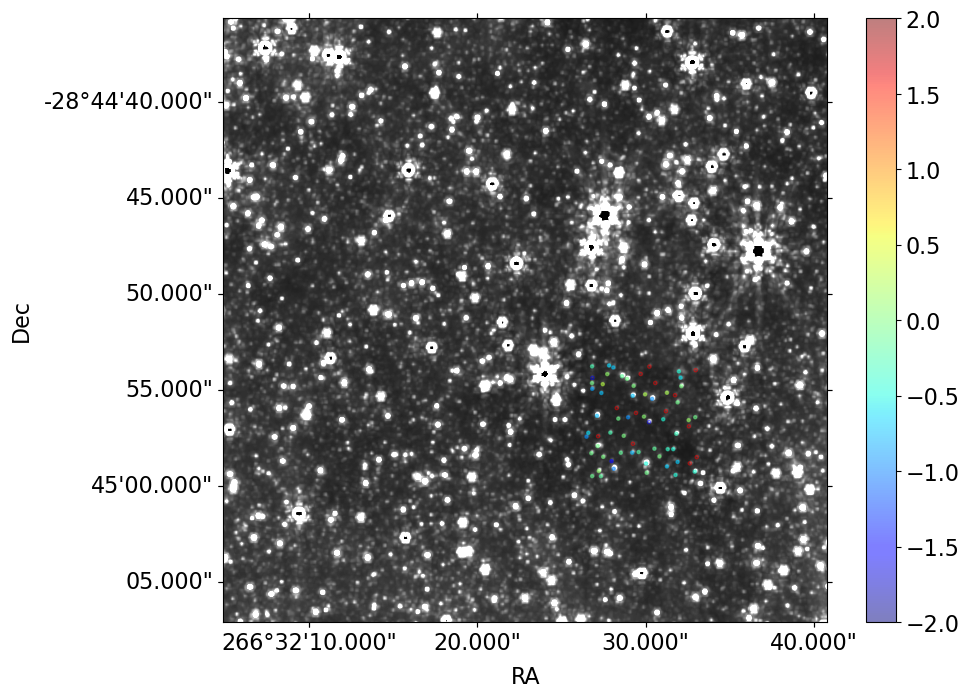

In [ ]:
color_plot(sel=sel, show_extremes=True);
pl.axis([1100,1600,600,1100])

# Show excluded / saturated stars

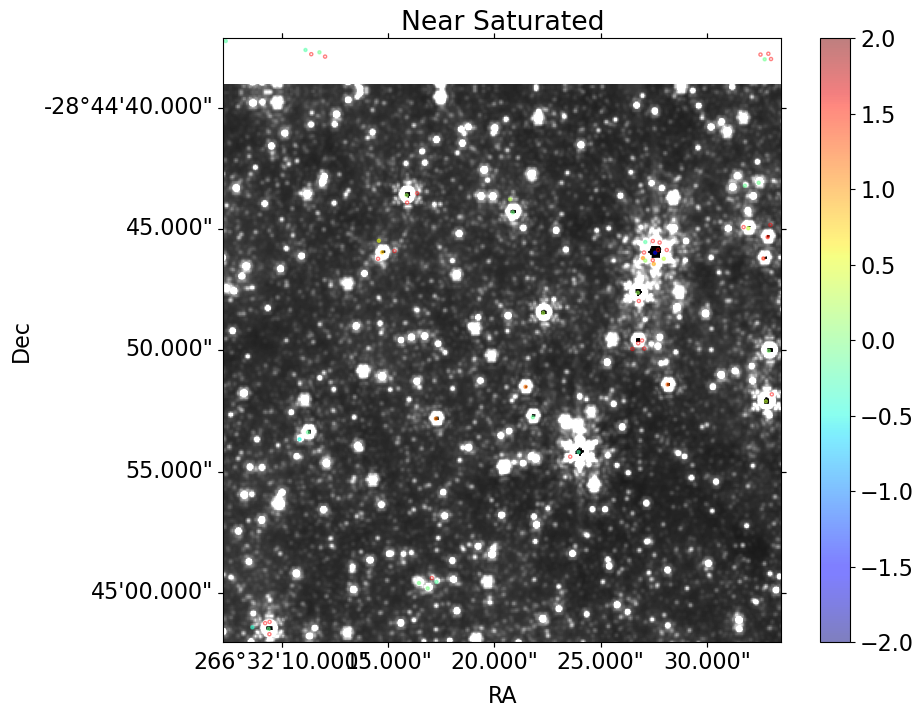

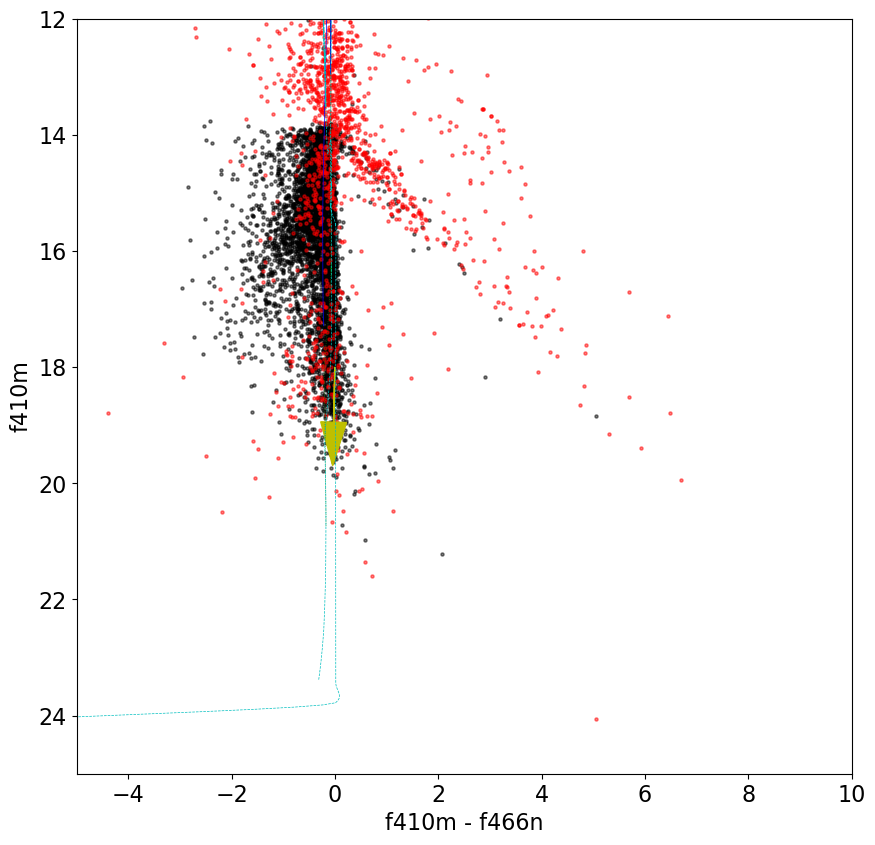

<Figure size 1000x800 with 0 Axes>

In [ ]:
color_plot(sel=any_saturated, show_extremes=True, reg=zoomregion);
pl.title("Near Saturated")
cmds_withiso(colors=[('f466n', 'f410m',),],
             fig=pl.figure(figsize=(10,10)),
             sel=any_saturated,
             ext=F11_MWGC(),
    );

# Show the 'bad corner' with satstars excluded

This plot shouldn't have any stars on it.  It doesn't in the zoom region!  Yay!


Feb 11, 2023: There are a couple too-red in 410-466 colors that are all somewhat near bright, saturated stars, but not so close htat they can be easily explained....

<Figure size 1000x800 with 0 Axes>

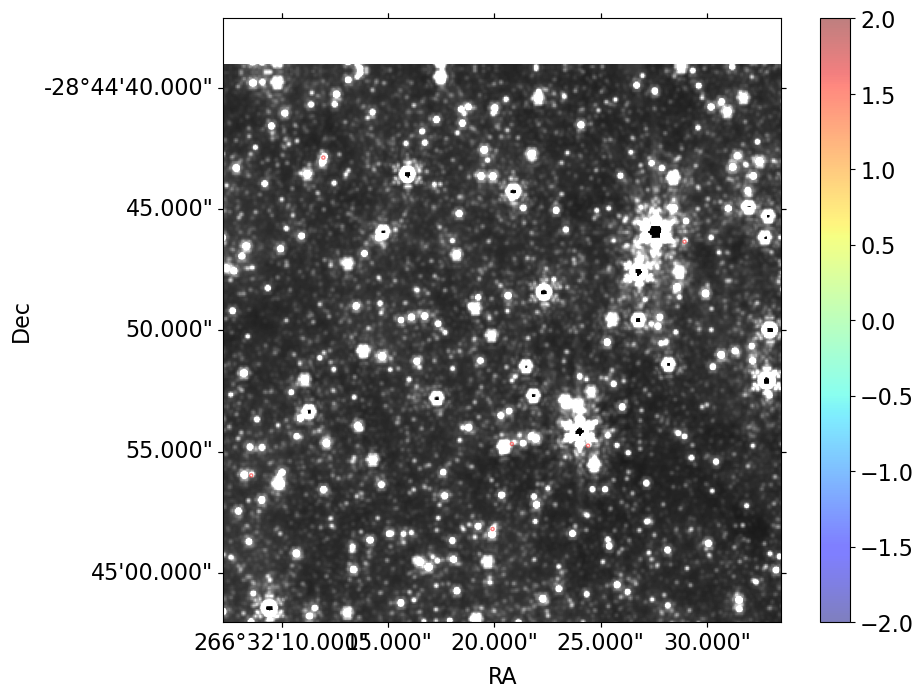

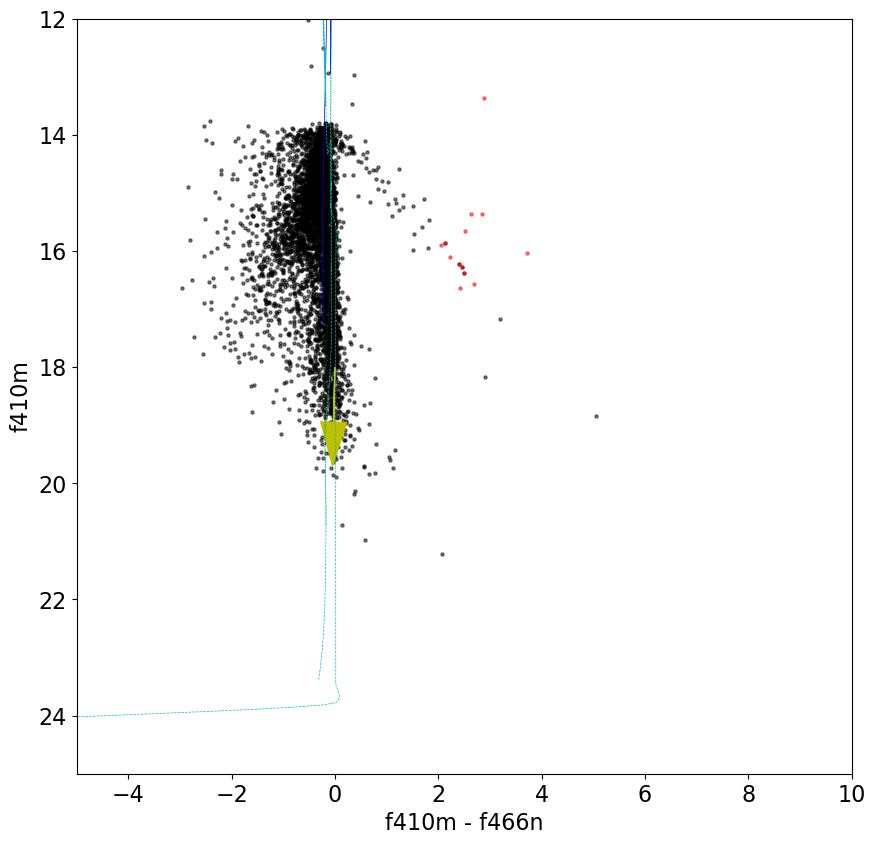

<Figure size 1000x800 with 0 Axes>

In [ ]:
upperrightsel = (((basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']) > 2.00) &
                 (basetable['mag_ab_f410m'] < 17) &
                 ~any_saturated
                )
pl.figure()
#pl.scatter(crds[upperrightsel].ra, crds[upperrightsel].dec)
color_plot(sel=upperrightsel, show_extremes=True, reg=zoomregion);
cmds_withiso(colors=[('f466n', 'f410m',),],
             fig=pl.figure(figsize=(10,10)),
             sel=upperrightsel,
             ext=F11_MWGC(),
    );

On further examination, most of the remainder are either on the edge of the image or are in weird spots (they're real stars that line up along the edge of saturated stars) or maybe they're really real

# Deep examination of "Zoom" region

In [ ]:
import regions

In [ ]:
zoomregions = regions.Regions.read('regions/leftside_brick_zoom.reg')
zoomregion = zoomregions[0]
rezoomregions = regions.Regions.read('regions/leftside_brick_rezoom.reg')
rezoomregion = rezoomregions[0]

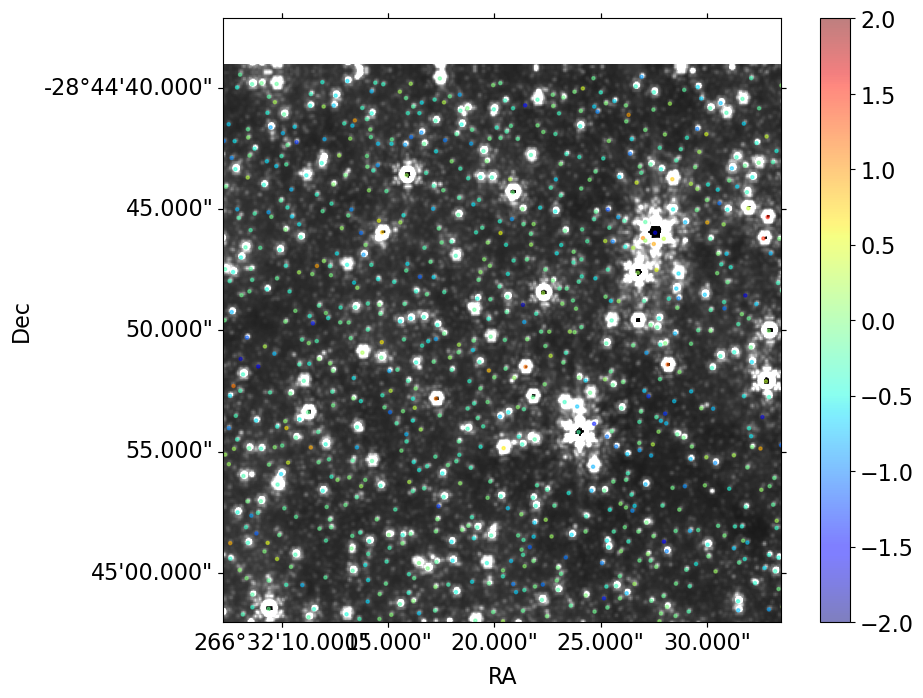

In [ ]:
color_plot(sel=zoomregion.contains(basetable['skycoord_f410m'], wcs=ww), reg=zoomregion);#show_extremes=True);

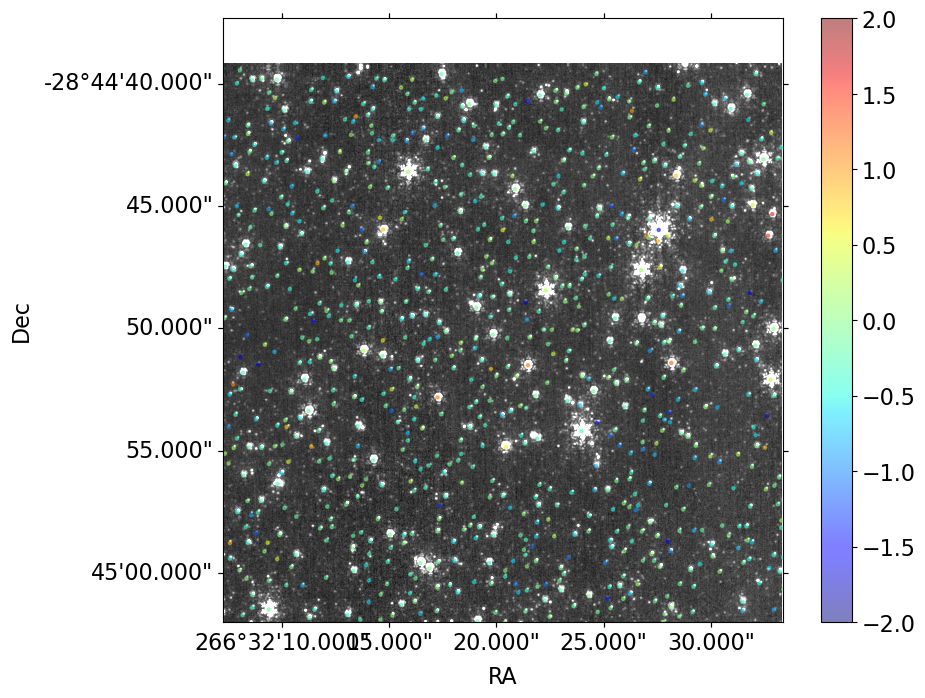

In [ ]:
color_plot(sel=zoomregion.contains(basetable['skycoord_f410m'], wcs=ww),
           fh=fits.open('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrca_i2d.fits'),
           reg=zoomregion);#show_extremes=True);

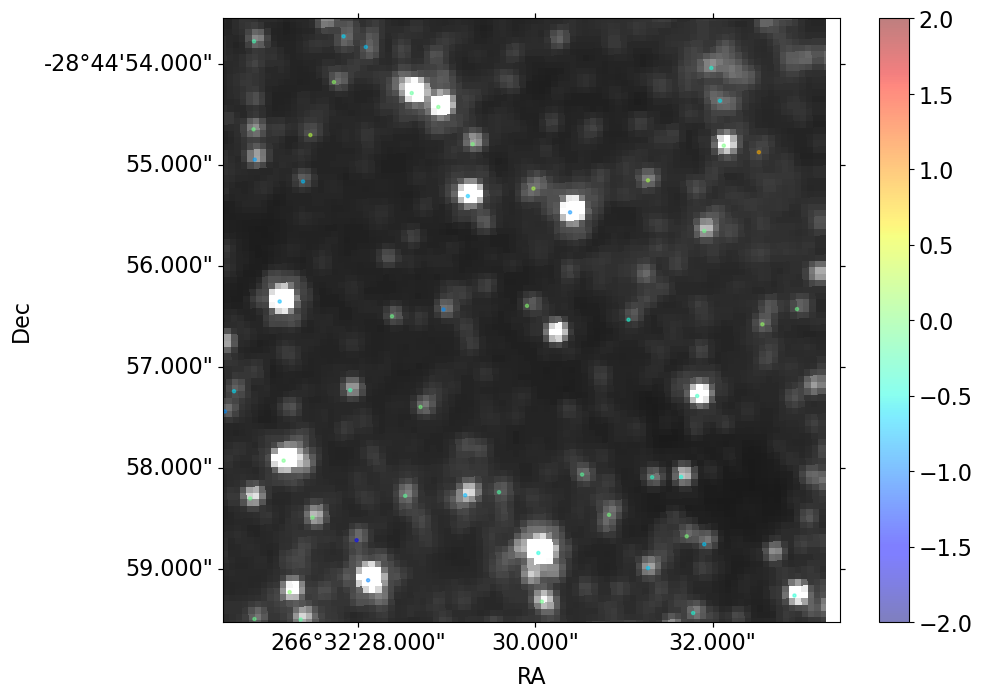

In [ ]:
color_plot(sel=rezoomregion.contains(basetable['skycoord_f410m'], wcs=ww), reg=rezoomregion);#show_extremes=True);

Why does the catalog still have wrong positions for F212N?

In [ ]:
sys.path.append(f'{basepath}/analysis/')
sys.path.append(f'{basepath}/reduction/')
import plot_tools
imp.reload(plot_tools)
from plot_tools import regzoomplot, starzoom, color_plot
def color_plot(basetable=basetable, fh=fh, **kwargs):
    return plot_tools.color_plot(basetable=basetable, fh=fh, **kwargs)

Text(0.5, 1.0, 'Merged version')

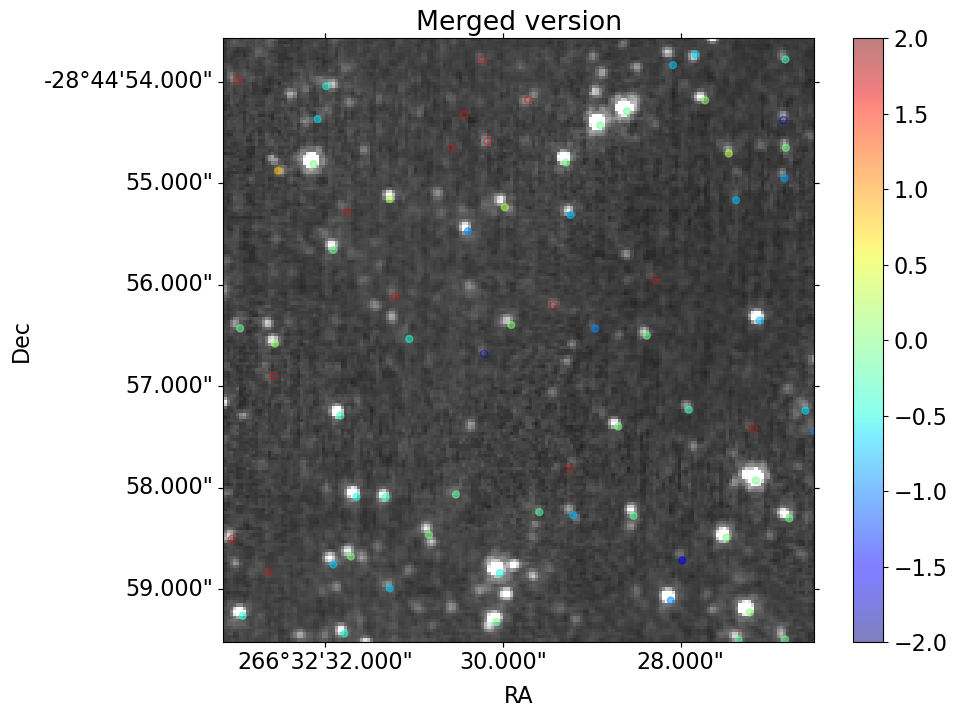

In [ ]:
color_plot(sel=rezoomregion.contains(basetable['skycoord_f410m'], wcs=ww),
           #fh=fits.open('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrca_i2d.fits'),
           fh=fits.open('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged-reproject_i2d.fits'),
           reg=rezoomregion,
           markersize=25,
           show_extremes=True);
pl.title("Merged version")

In [ ]:
color_plot(sel=rezoomregion.contains(basetable['skycoord_f410m'], wcs=ww),
           fh=fits.open('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-nrca_i2d.fits'),
           #fh=fits.open('/orange/adamginsburg/jwst/brick//F212N/pipeline/jw02221-o001_t001_nircam_clear-f212n-merged-reproject_i2d.fits'),
           reg=rezoomregion,
           markersize=25,
           show_extremes=True);
pl.title("Pipeline unmerged version");

# Where are the F466N dropouts?

There _are_ F466N dropouts, I can see them by blinking F410M with F466N.

I thought I tried to find them above but where are they?

In [ ]:
(~basetable['mag_ab_f410m'].mask) & (basetable['mag_ab_f466n'].mask)

In [ ]:
s1 = (~basetable['mag_ab_f410m'].mask) & (basetable['mag_ab_f466n'].mask)
xx = np.linspace(crds.ra.min(), crds.ra.max(), 25).value
yy = np.linspace(crds.dec.min(), crds.dec.max(), 25).value
zz, xe, ye = np.histogram2d(crds[s1].ra.value, crds[s1].dec.value, bins=[xx, yy])
cx = (xx[1:]+xx[:-1])/2
cy = (yy[1:]+yy[:-1])/2
pl.scatter(crds[s1].ra.deg, crds[s1].dec.deg)
#pl.contour(cx, cy, zz);
#pl.colorbar();
pl.title("Stars that have both F410M and F466N fluxes");

In [ ]:
avm = pyavm.AVM.from_image(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png')
img_narrow = np.array(PIL.Image.open(f'{basepath}/images/BrickJWST_nrca_longwave_narrowband_rotated_lighter.png'))[::-1,:,:]
wwi_narrow = wcs.WCS(fits.Header.fromstring(avm.Spatial.FITSheader))

img_narrow = img_narrow.swapaxes(0,1)
wwi_narrow = wwi_narrow.sub([2,1])

fig = pl.figure(figsize=(12,12))
ax = pl.subplot(projection=wwi_narrow)
ax.imshow(img_narrow)

crds = basetable['skycoord_f410m']

# Where do we detect 410M but not F466N?
# assume F466N threshold is 20th mag, so below that we just don't know
# then we want F410M about 2 mags bluer...
thissel = ((~any_saturated) & (~basetable['mag_ab_f410m'].mask) &
           (basetable['mag_ab_f466n'].mask) & (basetable['mag_ab_f410m'] < 18))
ax.scatter(
    crds.dec[thissel],
    crds.ra[thissel],
    transform=ax.get_transform('world'),
    s=5,
    marker='x',
    facecolors=(0.9, 1, 0.2), #yellowish
    #markeredgewidth=0.5,
    # for non-x facecolors='none'
    #edgecolors=(0.3, 0.5, 0.8), 
);


blue_410_466_vincl = (~any_saturated &
                     ((basetable['mag_ab_f410m'] - basetable['mag_ab_f466n']) +
                      (basetable['emag_ab_f410m']**2 + basetable['emag_ab_f466n']**2)**0.5 < -1.75))
thissel = (oksep & ~any_saturated & ~badblue &# ~magerr_gtpt1 &
           ~basetable['mag_ab_f410m'].mask &
           blue_410_466_vincl)

ax.scatter(
    crds.dec[thissel],
    crds.ra[thissel],
    transform=ax.get_transform('world'),
    s=5,
    marker='x',
    facecolors=(0.2, 1, 0.6),
    #markeredgewidth=0.5,
    # for non-x facecolors='none'
    #edgecolors=(0.3, 0.5, 0.8), 
);


#ax.scatter(crds.ra[blue_410_405], crds.dec[blue_410_405], edgecolors='orange', facecolors='none', transform=ax.get_transform('world'))
ax.coords['ra'].set_axislabel('Right Ascension')
ax.coords['dec'].set_axislabel('Declination')

ra = lon = ax.coords['ra']
dec = lat = ax.coords['dec']
lon.set_major_formatter('dd:mm:ss.ss')
lat.set_major_formatter('dd:mm:ss.ss')
#lon.set_ticks(spacing=30. * u.arcsec, color='red')
#lat.set_ticks(spacing=30. * u.arcsec, color='blue')
#lon.set_ticklabel(color='red')
#lat.set_ticklabel(color='blue')
#lon.grid(color='red')
#lat.grid(color='blue')

dec.set_ticks_position('l')
dec.set_ticklabel_position('l')
dec.set_axislabel_position('l')
ra.set_ticks_position('b')
ra.set_ticklabel_position('b')
ra.set_axislabel_position('b')
pl.title("Stars with f410m - f466n < -1.75 in cyan,\nwith f410m detected at <19 mag but not f466n detected in yellow");
# fig.savefig(f"{basepath}/images/ExtinctedStars_on_RGB.png", bbox_inches='tight')

In [ ]:
ext(4.665*u.um), ext